# Forecasting Assignment

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

# 1. Airlines Dataset


In [178]:
rohu = pd.read_excel("C:\\Users\\91920\\Downloads\\Airlines+Data.xlsx",
                       index_col=0, 
                       parse_dates=['Month'])
rohu

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


# Visualizations

In [179]:
rohu.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [180]:
rohu.index


DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

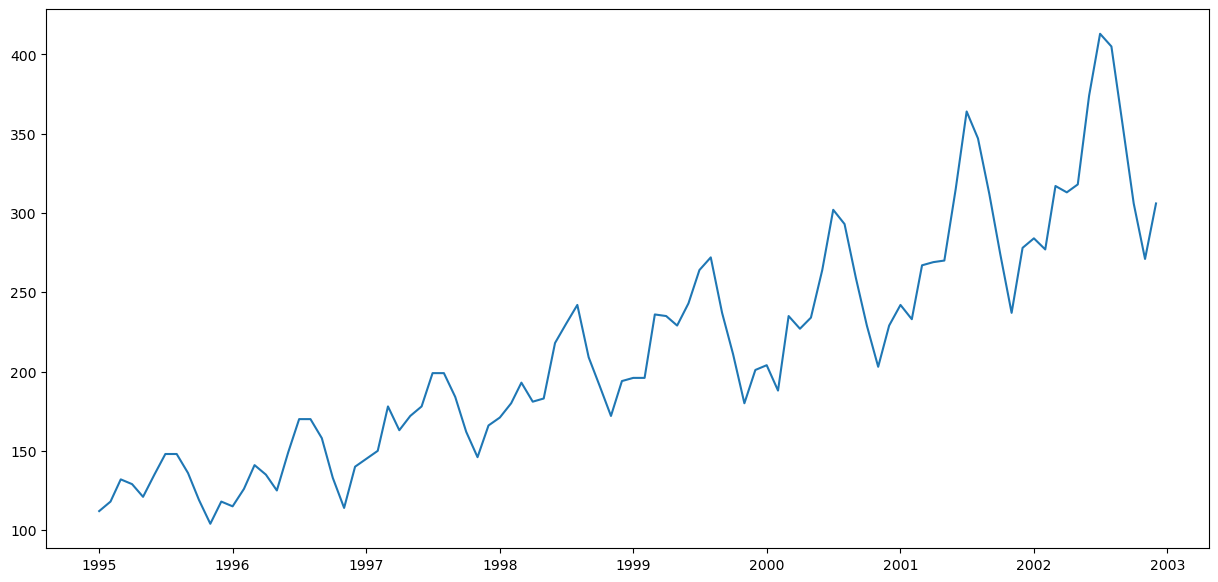

In [181]:
plt.figure(figsize = (15,7))
plt.plot(rohu)

In [182]:
#Time Series Data: The data appears to be in a time series format, with the 'Month' column as the time index. Time series data often represents observations collected at regular intervals over time.

#Trend Analysis: The plot displays the behavior of the airline data over time. You can visually inspect the plot to identify any underlying trends or patterns. These trends might include long-term increases or decreases in the data, which can provide insights into the airline's overall performance.

#Seasonal Patterns: Depending on the nature of the data, you might observe seasonal patterns or fluctuations that repeat at regular intervals. Seasonality in airline data could be related to holidays, vacation seasons, or other recurring factors affecting air travel.

#Outliers or Anomalies: Look for any unusual spikes or dips in the data. These anomalies could be due to special events, economic factors, or external factors affecting airline operations.

#Data Quality: Assess the quality of the data. Check for missing values, data gaps, or inconsistencies that might affect the accuracy of your analysis and modeling efforts.

#Data Visualization: The choice of line plot is appropriate for visualizing time series data because it helps reveal temporal patterns and trends. Consider adding labels, titles, and legends to enhance the clarity of the plot.

In [183]:
rohu = pd.read_excel("C:\\Users\\91920\\Downloads\\Airlines+Data.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True)
rohu

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


### Histogram and Density Plots

array([[<Axes: title={'center': 'Passengers'}>]], dtype=object)

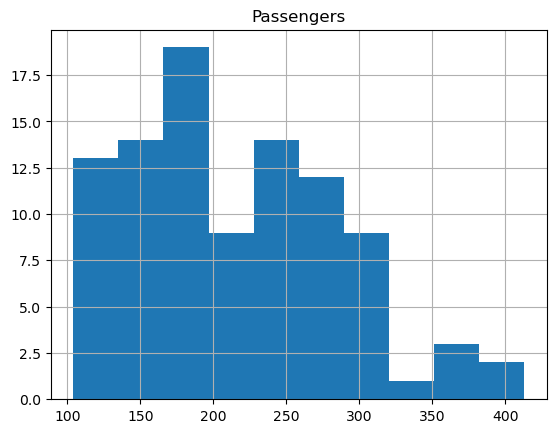

In [184]:
# create a histogram plot
rohu.hist()

In [185]:
#Data Distribution: The histogram provides a visual representation of the distribution of the data. You can observe how the data is spread across different values or ranges. It helps in understanding the central tendency, spread, and shape of the data.

#Data Skewness: Analyzing the shape of the histogram can give you insights into the skewness of the data. A symmetric distribution will have a bell-shaped histogram, while skewed data will show a longer tail on one side.

#Peak Values: Identify the peaks or modes in the histogram, which represent the most common or frequent values in the dataset.

#Spread of Data: The width of the histogram bars indicates the spread or variability in the data. Wider bars suggest greater variability, while narrower bars suggest a more concentrated distribution.

#Outliers: Look for any bars that are significantly taller or shorter than the majority of bars. These extreme values may represent outliers or unusual data points that require further investigation.

#Data Transformation: Depending on the distribution, you may consider data transformations (e.g., logarithmic or square root) to make the data more suitable for certain types of analysis or modeling.

<Axes: ylabel='Density'>

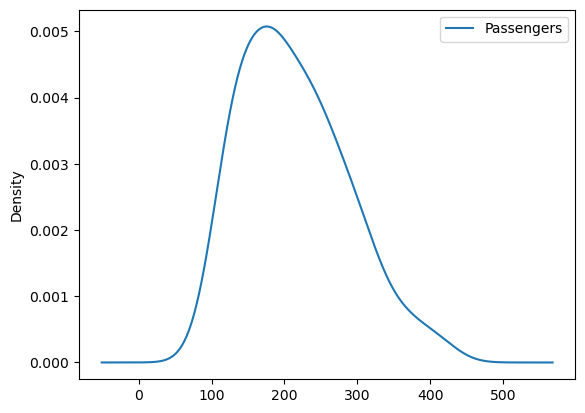

In [186]:
# create a density plot
rohu.plot(kind='kde')

In [187]:
#Data Distribution: The density plot provides a smoothed representation of the data's distribution. It offers a more continuous view of the data compared to a histogram.

#Skewness and Symmetry: Examine the shape of the density plot to assess the skewness and symmetry of the data. A symmetric distribution will have a roughly symmetric density plot, while skewed data will exhibit asymmetry.

#Modes and Peaks: Similar to a histogram, density plots can reveal modes or peaks in the data. These peaks correspond to the regions of highest data density, indicating prominent data values or clusters.

#Multimodal Distribution: If the density plot shows multiple peaks, it suggests that the data may have multiple modes or subpopulations within it.
    
#Continuous Trends: Density plots provide a continuous view of the data, which can be useful for identifying subtle trends, patterns, or variations in the distribution.

#Outliers: Look for isolated high-density regions (spikes) or low-density regions (troughs) in the plot, which may indicate the presence of outliers or unusual data points.    

In [188]:
rohu = pd.read_excel("C:\\Users\\91920\\Downloads\\Airlines+Data.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True,
                     squeeze=True)
rohu

C:\Users\91920\AppData\Local\Temp\ipykernel_22100\3467724508.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  rohu = pd.read_excel("C:\\Users\\91920\\Downloads\\Airlines+Data.xlsx",


Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [189]:
type(rohu)


pandas.core.series.Series

In [190]:
# Grouping by Year
groups = rohu.groupby(pd.Grouper(freq='A'))
groups

In [191]:
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values

years

,1995,1996,1997,1998,1999,2000,2001,2002
0,112,115,145,171,196,204,242,284
1,118,126,150,180,196,188,233,277
2,132,141,178,193,236,235,267,317
3,129,135,163,181,235,227,269,313
4,121,125,172,183,229,234,270,318
5,135,149,178,218,243,264,315,374
6,148,170,199,230,264,302,364,413
7,148,170,199,242,272,293,347,405
8,136,158,184,209,237,259,312,355
9,119,133,162,191,211,229,274,306


<Axes: >

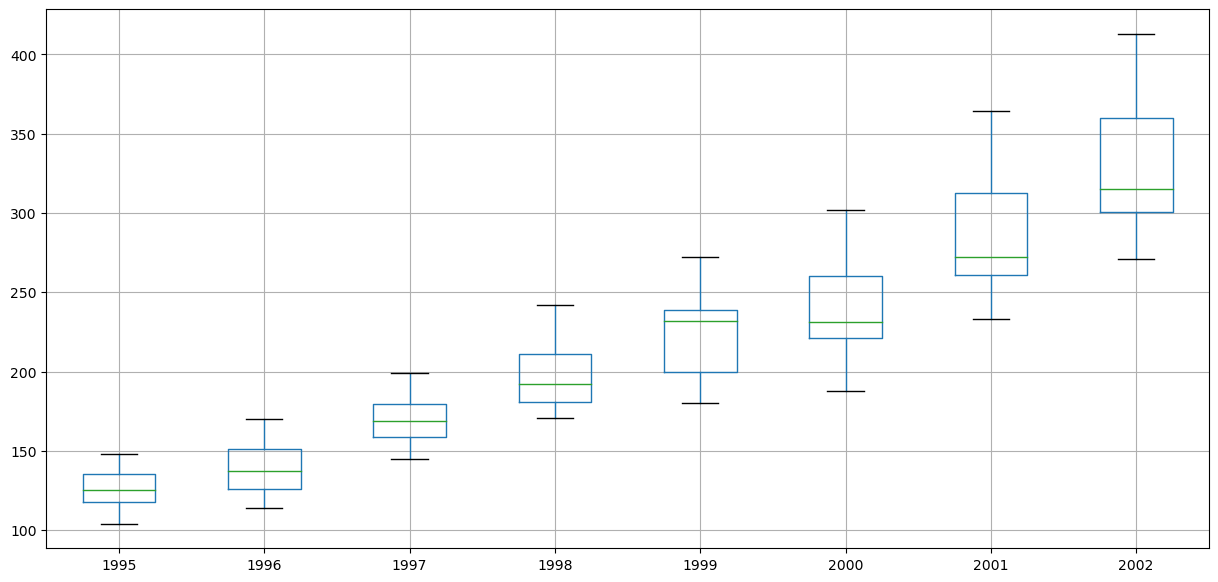

In [192]:
plt.figure(figsize = (15,7))
years.boxplot()

In [193]:
#Data Variation Over Years: The boxplot is used to visualize how the data varies across different years. Each box represents a year, and the distribution of data within each year is shown.

#Yearly Trends: Examine the boxplots to identify any trends or patterns in the data over the years. Look for changes in the central tendency (median) and the spread of the data (interquartile range) from one year to another.

#Seasonal Patterns: Boxplots can help reveal seasonal patterns or variations in the data. You can observe if certain years consistently exhibit higher or lower values during specific periods.

#Outliers: Look for individual data points or years that have data values significantly different from the majority. Outliers can be identified as points that fall outside the "whiskers" of the boxplots.

#Data Spread: The height of the boxes (interquartile range) provides an indication of the spread or variability of the data for each year. Wider boxes suggest greater variability, while narrower boxes indicate more consistent data.

# Lag plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

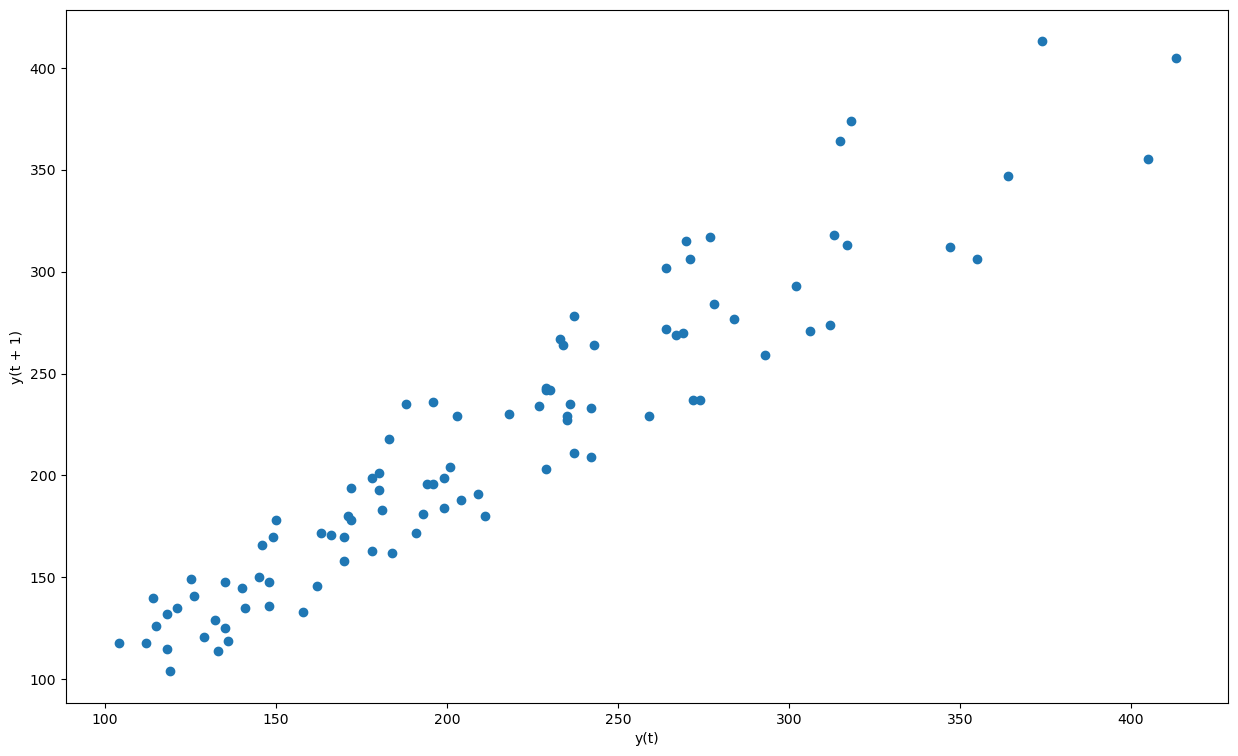

In [194]:
# create a scatter plot
plt.figure(figsize = (15,9))
pd.plotting.lag_plot(rohu)

In [195]:
#Lagged Relationship: The lag plot helps visualize the relationship between each data point and its lagged counterpart. Each point on the plot represents a pair of data points, where one is the original data point, and the other is its lagged version (shifted by one time step).

#Data Correlation: Observe the overall pattern of the points in the scatter plot. If the points exhibit a strong linear or non-linear pattern, it suggests a correlation or relationship between the data and its lagged values.

#Randomness: If the points appear scattered randomly without a clear pattern, it indicates that there is little to no correlation between the data and its lagged values, suggesting randomness in the data.

#Autocorrelation: The lag plot is often used in time series analysis to assess autocorrelation. Positive autocorrelation is indicated by points clustering along a diagonal line from the bottom-left to the top-right, while negative autocorrelation shows a diagonal line from the top-left to the bottom-right.

#Lag Order: The lag plot can help you determine an appropriate lag order for time series analysis. For example, if you see significant autocorrelation at lag 1, it suggests that the data is influenced by its previous time step.

<Figure size 3200x2000 with 0 Axes>

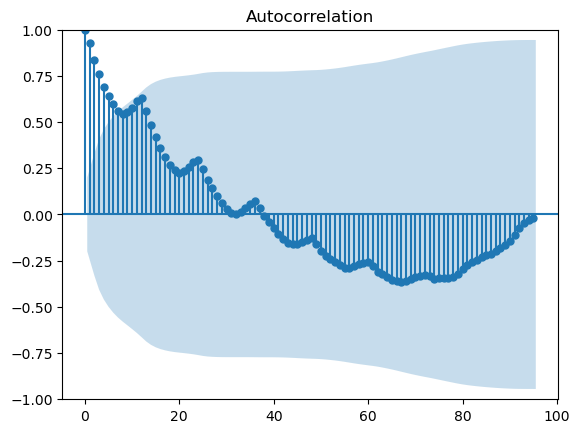

In [196]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (32,20))
plot_acf(rohu, lags=95)
plt.show()

In [197]:
#Autocorrelation Patterns: The autocorrelation plot displays the autocorrelation coefficients for different lag values. Each bar on the plot represents the autocorrelation at a specific lag. The lag values are shown on the horizontal axis.

#Lag Significance: Examine the heights of the bars to assess the significance of autocorrelation at different lags. Bars that extend beyond the shaded region (confidence interval) are considered statistically significant.

#Autocorrelation Strength: The height of the bars indicates the strength of the autocorrelation. Higher bars represent stronger autocorrelation, while lower bars represent weaker or no autocorrelation.

#Lag Order: The plot can help you determine an appropriate lag order for time series analysis and modeling. Significant autocorrelation at specific lags suggests that the data is influenced by its past values at those lags.

# Sampling and Basic Transformations


### Upsampling Data


In [198]:
rohu = pd.read_excel("C:\\Users\\91920\\Downloads\\Airlines+Data.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True,
                     squeeze=True)
rohu

C:\Users\91920\AppData\Local\Temp\ipykernel_22100\3467724508.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  rohu = pd.read_excel("C:\\Users\\91920\\Downloads\\Airlines+Data.xlsx",


Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [199]:
rohu.shape


(96,)

In [200]:
upsampled = rohu.resample('D').mean()
upsampled.head(20)

Month
1995-01-01    112.0
1995-01-02      NaN
1995-01-03      NaN
1995-01-04      NaN
1995-01-05      NaN
1995-01-06      NaN
1995-01-07      NaN
1995-01-08      NaN
1995-01-09      NaN
1995-01-10      NaN
1995-01-11      NaN
1995-01-12      NaN
1995-01-13      NaN
1995-01-14      NaN
1995-01-15      NaN
1995-01-16      NaN
1995-01-17      NaN
1995-01-18      NaN
1995-01-19      NaN
1995-01-20      NaN
Freq: D, Name: Passengers, dtype: float64

In [201]:
upsampled.shape


(2892,)

### Interpolate the Missing Value


In [202]:
interpolated = upsampled.interpolate(method='linear')
interpolated.head(30)

Month
1995-01-01    112.000000
1995-01-02    112.193548
1995-01-03    112.387097
1995-01-04    112.580645
1995-01-05    112.774194
1995-01-06    112.967742
1995-01-07    113.161290
1995-01-08    113.354839
1995-01-09    113.548387
1995-01-10    113.741935
1995-01-11    113.935484
1995-01-12    114.129032
1995-01-13    114.322581
1995-01-14    114.516129
1995-01-15    114.709677
1995-01-16    114.903226
1995-01-17    115.096774
1995-01-18    115.290323
1995-01-19    115.483871
1995-01-20    115.677419
1995-01-21    115.870968
1995-01-22    116.064516
1995-01-23    116.258065
1995-01-24    116.451613
1995-01-25    116.645161
1995-01-26    116.838710
1995-01-27    117.032258
1995-01-28    117.225806
1995-01-29    117.419355
1995-01-30    117.612903
Freq: D, Name: Passengers, dtype: float64

<Axes: xlabel='Month'>

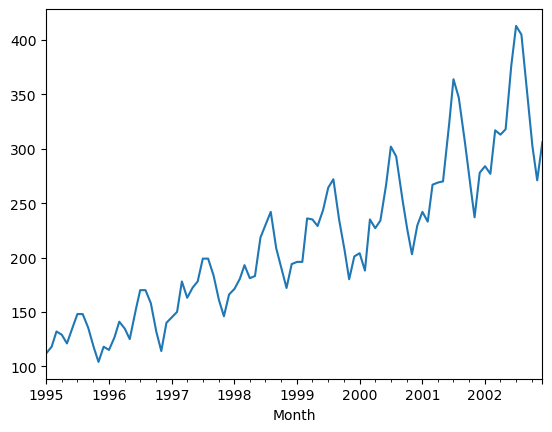

In [203]:
interpolated.plot()

In [204]:
#Upsampling: The original data appears to be at a lower frequency, and it is upsampled to a higher frequency (daily) using the resample method with the mean aggregation function. Upsampling can be useful for analyzing data at a finer time granularity.

#Missing Data Handling: Before interpolation, there might be missing values in the upsampled data. Linear interpolation is applied to fill in these missing data points. Linear interpolation estimates the missing values by drawing a straight line between adjacent data points and assigning values along this line.

#Interpolated Data: The interpolated DataFrame shows the time series data after interpolation. Linear interpolation creates new data points between existing observations, resulting in a continuous time series with fewer missing values.

#Linear Interpolation: Linear interpolation is a simple method to estimate missing values but assumes a linear relationship between data points. It may not capture complex patterns in the data.

#Data Smoothness: After interpolation, the time series data appears smoother and continuous. This can make it easier to visualize trends and patterns.

<Axes: xlabel='Month'>

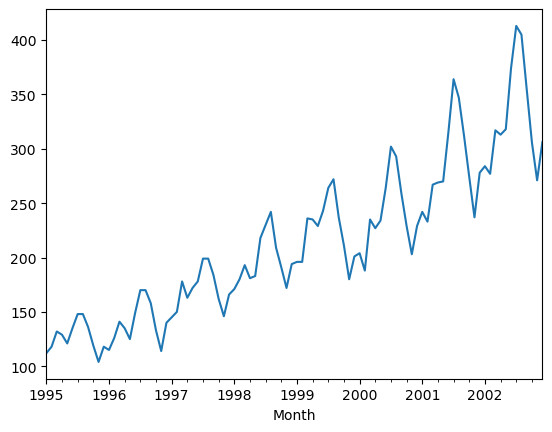

In [205]:
rohu.plot()


In [206]:
#Data Visualization: The line plot provides a visual representation of the original time series data, allowing you to observe its behavior and patterns.

#Temporal Trends: Examine the plot for any apparent temporal trends in the data. Trends can be increasing, decreasing, or relatively stable patterns over time.

#Seasonal Patterns: Look for repeating patterns or cycles in the data, which may suggest seasonality. Seasonal patterns often correspond to regular fluctuations that occur at fixed intervals (e.g., daily, weekly, monthly).

#Outliers and Anomalies: Check for any data points that deviate significantly from the overall pattern. Outliers or anomalies in the data may be indicative of unusual events or measurement errors.

# Downsampling Data


In [207]:
# downsample to quarterly intervals
resample = rohu.resample('Q')
quarterly_mean_sales = resample.mean()

<Axes: xlabel='Month'>

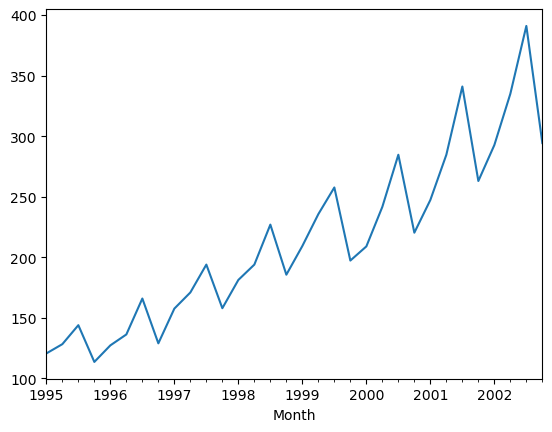

In [208]:
quarterly_mean_sales.plot()

In [209]:
#Temporal Trends: Examine the plot for any trends in the quarterly mean sales over time. Trends can be increasing, decreasing, or relatively stable patterns observed in the data.

#Seasonal Patterns: Quarterly data often exhibits seasonal patterns, which are regular fluctuations that occur at fixed intervals, typically each quarter. Seasonal patterns can help identify the impact of recurring events or seasons on sales.

#Cyclical Patterns: In addition to seasonality, look for longer-term cyclical patterns that may not have a fixed frequency. These cyclical patterns can be influenced by economic cycles, business cycles, or other external factors.
    
#Variability: Assess the variability in quarterly mean sales. Understanding the range and variability of sales data is crucial for setting expectations and making business decisions.

#Outliers: Check for any quarters that have exceptionally high or low mean sales values. Outliers can indicate exceptional events or anomalies that may require further investigation.

#Pattern Recognition: Use the plot to identify and understand the recurring patterns and fluctuations in sales. This knowledge is essential for forecasting and decision-making.    

# Tranformations

In [210]:
# load and plot a time series
rohu=pd.read_excel("C:\\Users\\91920\\Downloads\\Airlines+Data.xlsx",index_col=0,header=0, parse_dates=True)
rohu


,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


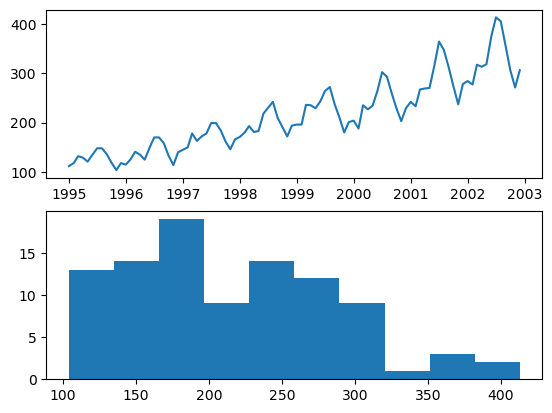

In [211]:
# line plot
plt.subplot(211)
plt.plot(rohu)

# histogram
plt.subplot(212)
plt.hist(rohu)
plt.show()

In [212]:
# Line Plot (Top Subplot):

#Temporal Patterns: The line plot of the time series data allows you to observe the temporal patterns and trends present in the data over time. This can include trends that are increasing, decreasing, or relatively stable.

#Seasonal Patterns: Look for recurring patterns or seasonality in the data. Seasonal patterns often correspond to regular fluctuations that occur at fixed intervals (e.g., monthly, quarterly, yearly). These patterns can be indicative of seasonal effects on the data.

#Outliers: Examine the plot for any extreme values or outliers. Outliers are data points that deviate significantly from the overall pattern and may represent unusual events or errors in data collection.

# Histogram (Bottom Subplot):

#Data Distribution: The histogram provides insights into the distribution of data values. It allows you to assess whether the data is approximately normally distributed or exhibits a different distribution shape, such as skewness.

#Data Spread: Observe the spread of data values across different bins in the histogram. The width of the bins and the number of data points in each bin reflect the variability or spread of the data.

#Data Concentration: Histograms can indicate where data values are concentrated. Peaks or modes in the histogram represent regions where data values are more prevalent.

#Data Skewness: Assess the symmetry of the data distribution. A symmetric distribution will have a bell-shaped histogram, while skewed data will show a longer tail on one side.

#Data Range: The histogram helps visualize the range of data values and any potential outliers or extreme values.

#Data Preprocessing: Insights from the histogram can guide data preprocessing decisions, such as identifying and handling outliers or choosing appropriate data transformations.

#Data Quality: Consider whether there are any data quality issues, such as missing data or irregularities, that may affect the distribution.

# Log Transform


In [213]:
dataframe = pd.DataFrame(np.log(rohu.values), columns = ['Passengers'])
dataframe

,Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
91,6.003887
92,5.872118
93,5.723585
94,5.602119


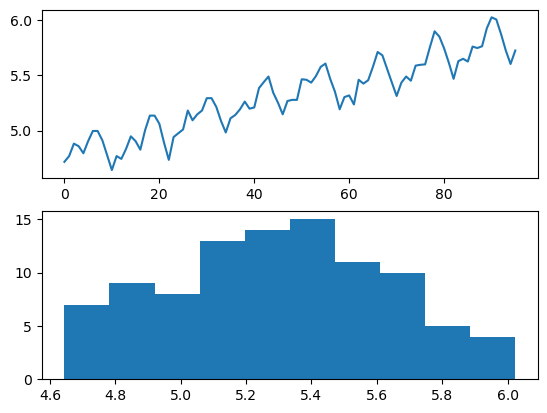

In [214]:
# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])

# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

In [215]:
#Line Plot (Top Subplot):

#Logarithmic Transformation: The line plot displays the time series data after applying a natural logarithmic transformation. Logarithmic transformations are often used to stabilize variance and make the data more amenable to certain types of analysis, especially when the data exhibits exponential growth or multiplicative patterns.

#Smoothing Effect: The logarithmic transformation can have a smoothing effect on the data, reducing the impact of extreme values and making trends and patterns more apparent.

#Histogram (Bottom Subplot):

#Log-Normal Distribution: The histogram of the log-transformed data often approximates a normal distribution or a distribution that is closer to normal than the original data. This can be beneficial for statistical analysis that assumes normality.

#Symmetry: Observe whether the histogram appears more symmetric compared to the histogram of the original data. A more symmetric distribution may indicate a better fit to normality.

In [216]:
quarterly_mean_sales.head()


Month
1995-03-31    120.666667
1995-06-30    128.333333
1995-09-30    144.000000
1995-12-31    113.666667
1996-03-31    127.333333
Freq: Q-DEC, Name: Passengers, dtype: float64

# Square Root Transform


In [217]:
dataframe = pd.DataFrame(np.sqrt(rohu.values), columns = ['Passengers'])
dataframe

,Passengers
0,10.583005
1,10.862780
2,11.489125
3,11.357817
4,11.000000
...,...
91,20.124612
92,18.841444
93,17.492856
94,16.462078


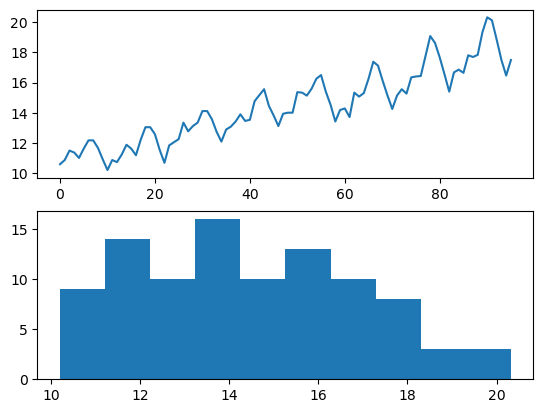

In [218]:
# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])

# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

In [219]:
# Line Plot (Top Subplot):

#Square Root Transformation: The line plot displays the time series data after applying a square root transformation. Square root transformations are used to stabilize variance and make the data more amenable to certain types of analysis, particularly when the data exhibits non-constant variance or positive skewness.

#Smoothing Effect: Similar to the logarithmic transformation, the square root transformation can have a smoothing effect on the data. It reduces the impact of extreme values and can make trends and patterns more apparent.

#Histogram (Bottom Subplot):

#Approximating Normality: Similar to the logarithmic transformation, the histogram of the square root-transformed data may approximate a normal distribution or a distribution closer to normality than the original data. This can be advantageous for statistical analyses that assume normality.

#Symmetry: Observe whether the histogram appears more symmetric compared to the histogram of the original data. A more symmetric distribution may indicate a better fit to normality.

# Forecasting - Model Based Methods


In [220]:
rohu=pd.read_excel("C:\\Users\\91920\\Downloads\\Airlines+Data.xlsx")
rohu

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<Axes: >

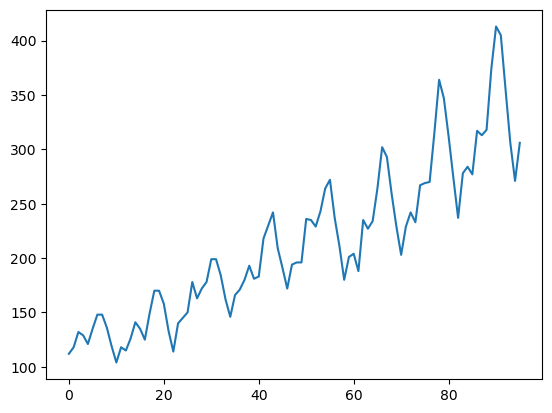

In [221]:
rohu['Passengers'].plot()


In [222]:
#Passenger Count Over Time: The line plot provides a visual representation of the "Passengers" data over time. It allows you to observe the changes and fluctuations in the number of passengers, which is a common metric in the airline industry.

In [223]:
rohu["month"] = rohu['Month'].dt.strftime("%b") # month extraction
rohu["year"] = rohu['Month'].dt.strftime("%Y") # year extraction

In [224]:
rohu

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [225]:
mp = pd.pivot_table(data = rohu,
                                 values = "Passengers",
                                 index = "year",
                                 columns = "month",
                                 aggfunc = "mean",
                                 fill_value=0)
mp

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


<Axes: xlabel='month', ylabel='year'>

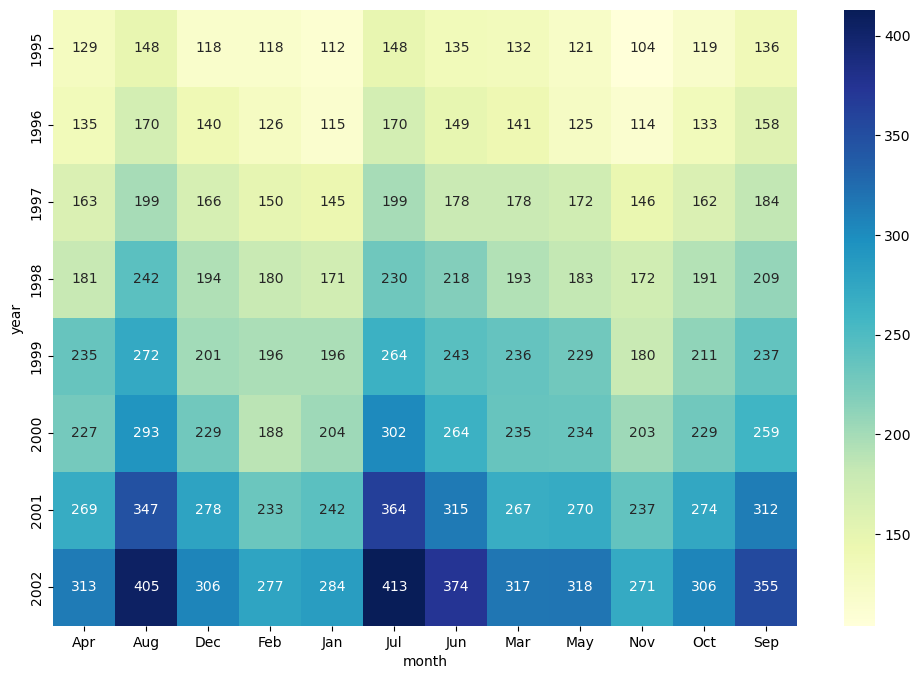

In [226]:
plt.figure(figsize=(12,8))
sns.heatmap(mp,
            annot=True,
            fmt="g",
            cmap = 'YlGnBu') #fmt is format of the grid values

In [227]:
#Seasonal Patterns: The heatmap reveals the seasonal patterns in airline passenger data over multiple years. Each row represents a year, and each column represents a month. Darker shades typically indicate higher average passenger counts for that month in a given year.

#Summer Peaks: In many cases, the summer months (June, July, and August) appear to have higher passenger counts, represented by darker shades. This is a common pattern in the airline industry, as summer is a popular time for vacations and travel.

#Yearly Variations: Observe how the pattern varies from year to year. Differences in passenger counts for the same month between different years can indicate changes in travel trends or external factors affecting air travel.

#Winter Months: The winter months (December, January, and February) often show lighter shades, indicating lower passenger counts. This reflects the seasonality of air travel, with fewer people traveling during the winter months compared to the summer.

#Annotations: The annotations within each grid cell provide the average passenger count for a specific month and year. These values can be used for precise comparisons and trend analysis.

#Data Aggregation: The pivot table aggregates the data by calculating the mean passenger count for each month and year. This allows for a clearer visualization of average monthly trends.

#Data Exploration: Heatmaps are valuable for exploratory data analysis (EDA) as they help identify patterns and trends in complex datasets. They provide an at-a-glance view of the data's characteristics.

#Business Insights: For airline companies or related industries, insights from this heatmap can inform decisions related to scheduling, staffing, and marketing based on seasonal demand.

#Data Presentation: The use of a heatmap makes it easier to spot patterns compared to raw data tables or line plots.

#Color Mapping: The color mapping in the heatmap (in this case, 'YlGnBu') is chosen to represent the varying passenger counts effectively. Darker shades indicate higher values, while lighter shades represent lower values.


<Axes: xlabel='year', ylabel='Passengers'>

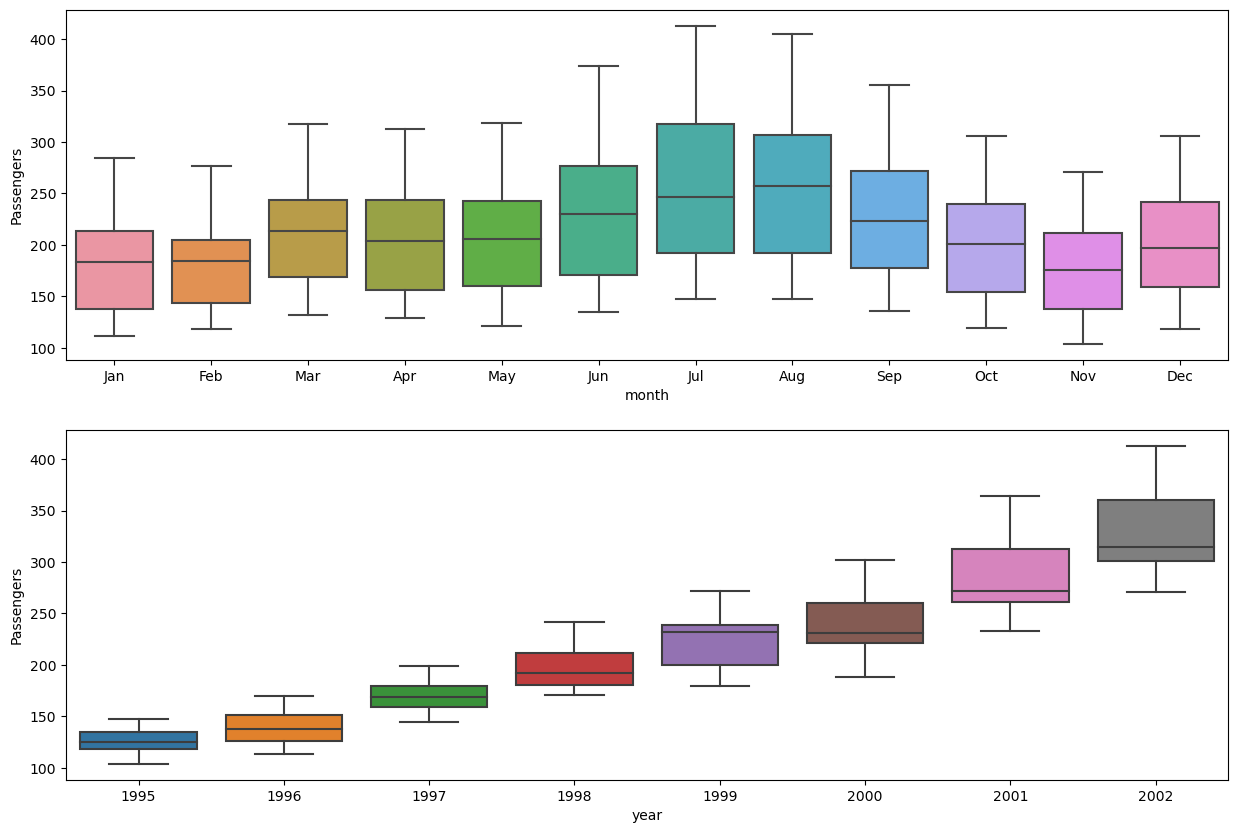

In [228]:
# Boxplot for ever
plt.figure(figsize=(15,10))

plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=rohu)

plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=rohu)

In [229]:
#Monthly Variability: The top subplot shows a boxplot for the number of passengers grouped by month. Each box represents a month, and the vertical spread of the boxes reflects the variability in passenger counts for that specific month.

#Seasonal Differences: Observe differences in the spread of passenger counts between months. Months with wider boxes have more significant variations in passenger numbers, while narrower boxes indicate more consistent passenger counts.

#Outliers: Check for individual data points (dots) outside the whiskers of the boxes. Outliers may represent unusual months with exceptionally high or low passenger counts, possibly due to special events or factors.

#Central Tendency: The position of the median line within each box provides an estimate of the central tendency (typically the median) of passenger counts for each month.

#Seasonal Peaks: Identify months with higher medians or more extended upper quartiles, indicating higher passenger counts. These months may correspond to peak travel seasons or holidays.

#Boxplot for Years (Bottom Subplot):
#Yearly Variability: The bottom subplot displays a boxplot for passenger counts grouped by year. Each box represents a year, and the vertical spread of the boxes illustrates the variability in passenger counts for that specific year.

#Year-to-Year Differences: Compare the spread and position of boxes across different years. Wider boxes suggest larger year-to-year variations in passenger numbers, while narrower boxes indicate more stable trends.
    
#Outliers: Look for outliers in the form of individual data points outside the whiskers of the boxes. Outliers may represent exceptional years with unusually high or low passenger counts.

#Central Tendency: The position of the median line within each box provides an estimate of the central tendency (typically the median) of passenger counts for each year.    

<Axes: xlabel='year', ylabel='Passengers'>

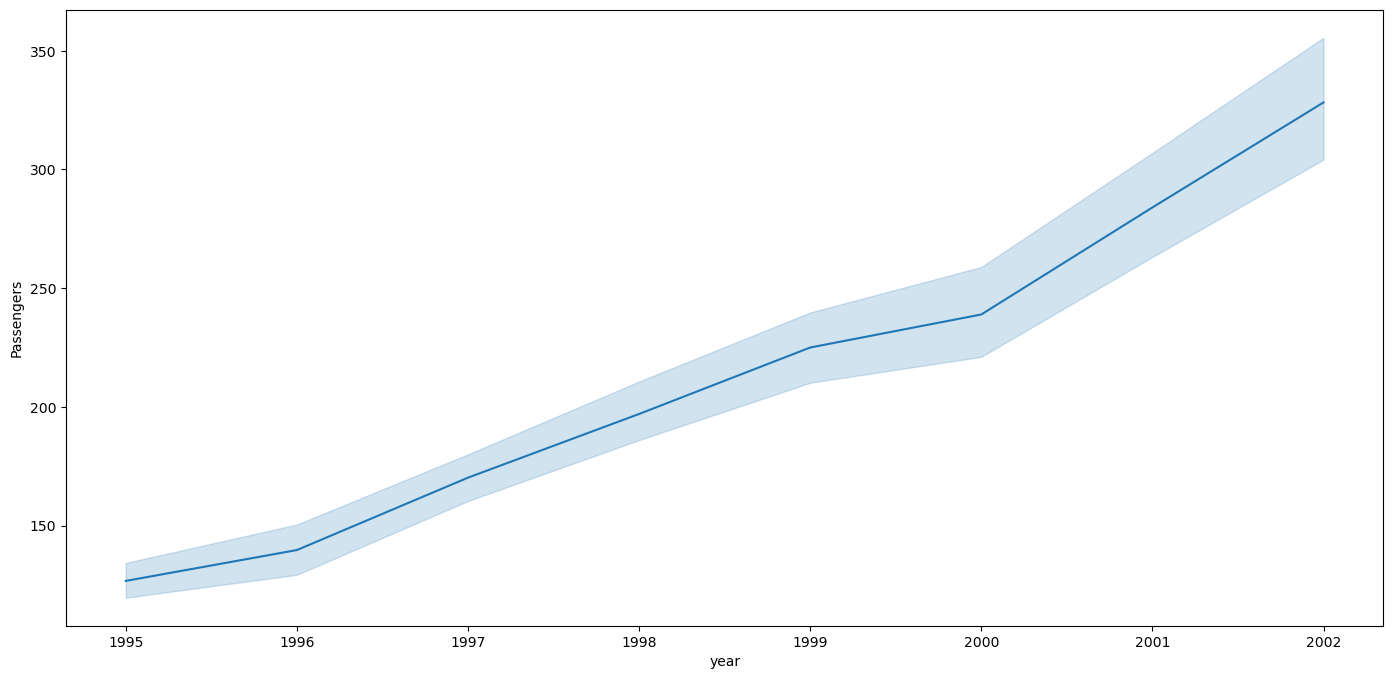

In [230]:
plt.figure(figsize=(17,8))
sns.lineplot(x="year",y="Passengers",data=rohu)

In [231]:
#Yearly Trend: The line plot depicts the yearly trend in airline passenger counts over the available years. Each point on the line represents the passenger count for a specific year.

#Overall Growth or Decline: Observe whether there is an overall trend of growth or decline in passenger counts over the years. Rising values suggest increasing passenger numbers, while falling values indicate decreasing numbers.

#Fluctuations: Identify any fluctuations or cycles in the data. These fluctuations may be regular or irregular and can provide insights into seasonal or cyclical patterns in air travel.

#Outliers: Check for any years that deviate significantly from the overall trend. Outliers may represent exceptional years with unusually high or low passenger counts and could be due to specific events or factors.

#Year-to-Year Variability: Assess the year-to-year variability in passenger counts. Wider fluctuations indicate higher variability, while smoother trends suggest more stable passenger numbers.

#Data Presentation: A line plot is an effective way to visualize trends over time, making it easier to communicate and understand how passenger counts have evolved.

#Forecasting Considerations: Insights from the plot can inform forecasting efforts. Understanding historical trends is crucial for predicting future passenger counts accurately.

#Business Strategy: The trends observed in the line plot can guide business strategies, such as capacity planning, marketing, and resource allocation.

#Data Interpretation: Be cautious when interpreting the trend, as it represents historical data. External factors, such as economic conditions, airline industry changes, and global events, can influence trends in passenger counts.

#Further Analysis: Depending on your goals, you may want to perform additional analyses, such as decomposing the time series into trend, seasonality, and residual components, to gain deeper insights into the underlying patterns.


# Splitting data


In [232]:
rohu


,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [233]:
rohu.shape


(96, 4)

In [234]:
# Complete the dataset
rohu['t']=np.arange(1,97)
rohu['t_square']=np.square(rohu.t)
rohu['log_Passengers']=np.log(rohu.Passengers)
rohu2=pd.get_dummies(rohu['month'])

In [235]:
rohu


,Month,Passengers,month,year,t,t_square,log_Passengers
0,1995-01-01,112,Jan,1995,1,1,4.718499
1,1995-02-01,118,Feb,1995,2,4,4.770685
2,1995-03-01,132,Mar,1995,3,9,4.882802
3,1995-04-01,129,Apr,1995,4,16,4.859812
4,1995-05-01,121,May,1995,5,25,4.795791
...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887
92,2002-09-01,355,Sep,2002,93,8649,5.872118
93,2002-10-01,306,Oct,2002,94,8836,5.723585
94,2002-11-01,271,Nov,2002,95,9025,5.602119


In [236]:
rohu2


,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [237]:
rohu=pd.concat([rohu,rohu2],axis=1)
rohu

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


In [238]:
# For self understanding of forecasting values data split into multiples of 12
Train = rohu.head(84)
Test = rohu.tail(12)

In [239]:
Train

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2001-08-01,347,Aug,2001,80,6400,5.849325,0,1,0,0,0,0,0,0,0,0,0,0
80,2001-09-01,312,Sep,2001,81,6561,5.743003,0,0,0,0,0,0,0,0,0,0,0,1
81,2001-10-01,274,Oct,2001,82,6724,5.613128,0,0,0,0,0,0,0,0,0,0,1,0
82,2001-11-01,237,Nov,2001,83,6889,5.468060,0,0,0,0,0,0,0,0,0,1,0,0


In [240]:
Test


,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
84,2002-01-01,284,Jan,2002,85,7225,5.648974,0,0,0,0,1,0,0,0,0,0,0,0
85,2002-02-01,277,Feb,2002,86,7396,5.624018,0,0,0,1,0,0,0,0,0,0,0,0
86,2002-03-01,317,Mar,2002,87,7569,5.758902,0,0,0,0,0,0,0,1,0,0,0,0
87,2002-04-01,313,Apr,2002,88,7744,5.746203,1,0,0,0,0,0,0,0,0,0,0,0
88,2002-05-01,318,May,2002,89,7921,5.762051,0,0,0,0,0,0,0,0,1,0,0,0
89,2002-06-01,374,Jun,2002,90,8100,5.924256,0,0,0,0,0,0,1,0,0,0,0,0
90,2002-07-01,413,Jul,2002,91,8281,6.023448,0,0,0,0,0,1,0,0,0,0,0,0
91,2002-08-01,405,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0


In [241]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

53.19923653480264

In [242]:
#Exponential
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.05736110315608

In [243]:
#Quadratic 
Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

48.051888979331586

In [244]:
#Additive seasonality 
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.81978481421817

In [245]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.36081761208163

In [246]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea


140.06320204708635

In [247]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

10.519172544324785

In [248]:
#Multiplicative Seasonality Quadratic 
mult_sea_Quad = smf.ols('log_Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad

325.7312105213401

In [249]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,10.519173
4,rmse_add_sea_quad,26.360818
1,rmse_Exp,46.057361
2,rmse_Quad,48.051889
0,rmse_linear,53.199237
3,rmse_add_sea,132.819785
5,rmse_Mult_sea,140.063202


In [250]:
#Build the model on entire data set
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=rohu).fit()

In [251]:
pred_new  = pd.Series(model_full.predict(rohu))
pred_new

0     4.692963
1     4.703487
2     4.846666
3     4.813814
4     4.807291
        ...   
91    5.978339
92    5.868100
93    5.737989
94    5.607538
95    5.744085
Length: 96, dtype: float64

In [252]:
rohu["forecasted_Passengers"] = pd.Series(np.exp(pred_new))

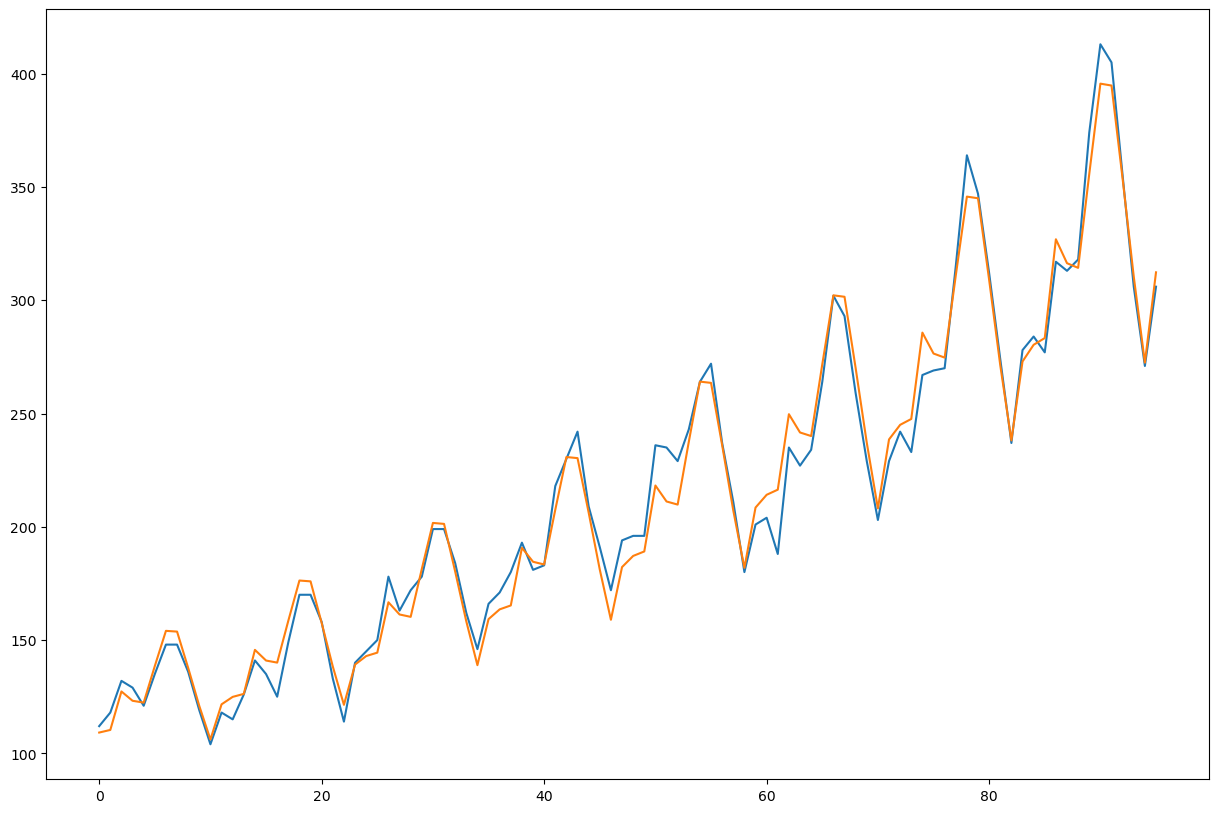

In [253]:
plt.figure(figsize=(15,10))
plt.plot(rohu[['Passengers','forecasted_Passengers']].reset_index(drop=True))

In [254]:
#Model Predictions: The code uses a forecasting model (not shown in the provided code) to make predictions for future passenger counts. The predicted values are stored in the forecasted_Passengers column.

#Time Series Plot: The line plot shows the original passenger counts (blue line) and the forecasted passenger counts (orange line) over time. This visualization allows for a visual comparison between the actual historical data and the model's predictions.

#Model Evaluation: The accuracy and performance of the forecasting model should be evaluated to determine how well it captures the underlying patterns in the data. Evaluation metrics such as Mean Absolute Error (MAE) or Root Mean Square Error (RMSE) can provide insights into the model's predictive accuracy.

#Model Validation: To assess the model's reliability, it's essential to validate its predictions against a holdout dataset or conduct cross-validation to ensure that the model generalizes well to unseen data.

#Forecast Horizon: Consider the forecast horizon or time frame for which predictions were made. Depending on the model and its parameters, forecasts may vary in accuracy for different time periods.

#Confidence Intervals: In some forecasting models, confidence intervals can be calculated to provide a range of uncertainty around the predictions. These intervals help assess the reliability of the forecasts.

#Data Transformation: The code applies the inverse of a logarithmic transformation (assuming that the original data was log-transformed) to obtain forecasted passenger counts in their original scale.


# Splitting data


In [255]:
rohu=pd.read_excel("C:\\Users\\91920\\Downloads\\Airlines+Data.xlsx")
Train = rohu.head(84)
Test = rohu.tail(12)

In [256]:
Train

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
79,2001-08-01,347
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237


In [257]:
Test


,Month,Passengers
84,2002-01-01,284
85,2002-02-01,277
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318
89,2002-06-01,374
90,2002-07-01,413
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306


# Moving Average

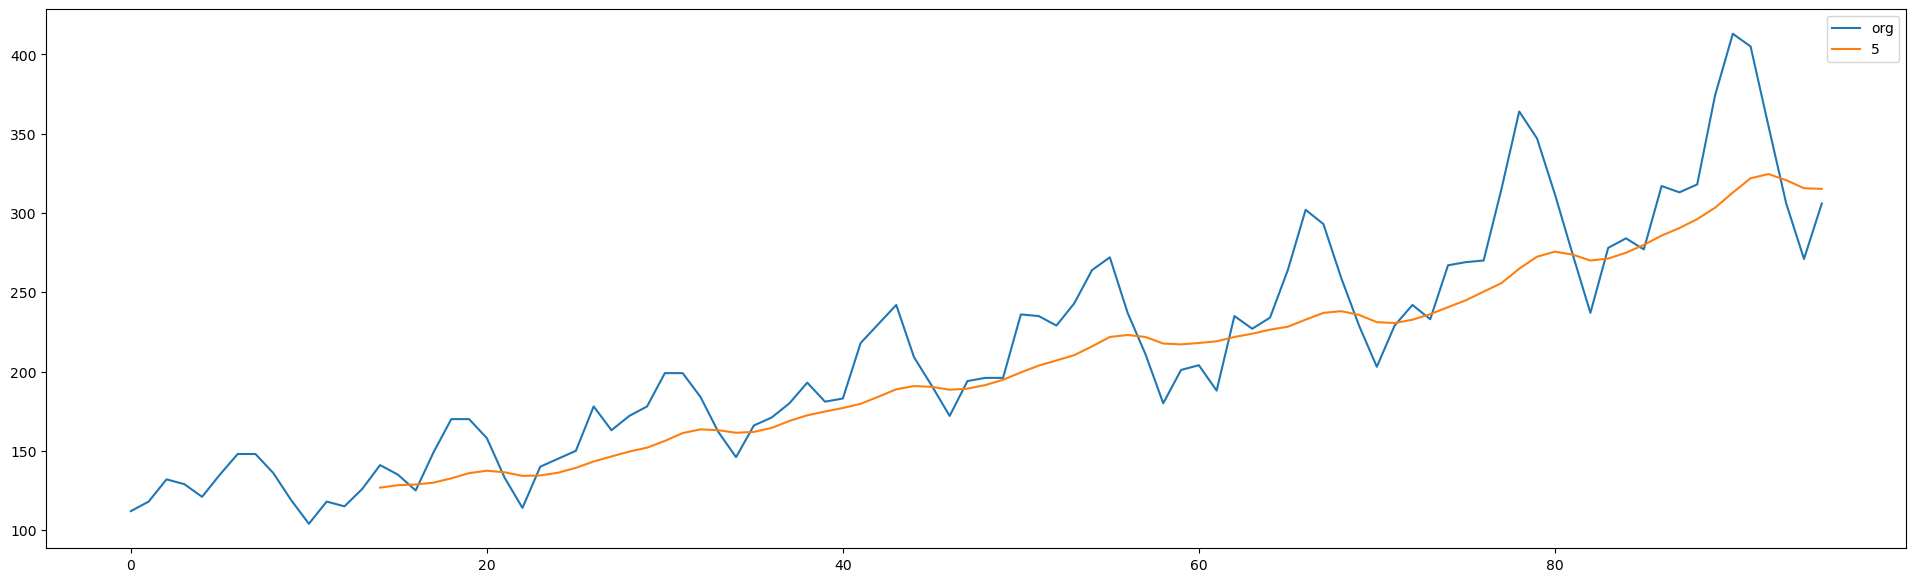

In [258]:
plt.figure(figsize=(24,7))
rohu['Passengers'].plot(label="org")
rohu["Passengers"].rolling(15).mean().plot(label=str(5))
plt.legend(loc='best')

In [259]:
#Original Data: The blue line in the plot represents the original passenger counts over time. This line provides a visual representation of the raw data and allows for the observation of trends and patterns.

#Rolling Mean: The orange line represents the rolling mean of passenger counts with a window size of 15. The rolling mean is calculated by averaging the data within a moving window of 15 consecutive data points.

#Smoothing Effect: The rolling mean line smooths out short-term fluctuations and noise in the data, making it easier to discern underlying trends and patterns. It provides a clearer view of the data's overall behavior.

#Trend Identification: The rolling mean can help identify longer-term trends in the data. Increases or decreases in the rolling mean suggest changes in the underlying passenger counts over a specific period.

#Window Size: The choice of a window size (in this case, 15) affects the level of smoothing. Smaller window sizes capture shorter-term variations, while larger window sizes provide a more generalized view of trends.

#Seasonality Detection: If there are seasonality patterns in the data, the rolling mean can help reveal them by highlighting regular oscillations or cycles.

#Data Presentation: The plot's large size (specified as figsize) enhances data visibility, making it easier to analyze and interpret the trends and smoothing effect.

#Comparative Analysis: By overlaying the rolling mean on the original data, viewers can compare short-term variations (original data) to longer-term trends (rolling mean) simultaneously.

#Interpretation: Interpretation of the rolling mean should consider that it represents a smoothed version of the data. It may lag behind abrupt changes in the original data due to the averaging process.

#Insight Gathering: This visualization is a valuable exploratory tool for gaining insights into the data's behavior and identifying potential areas of interest for further analysis or modeling.


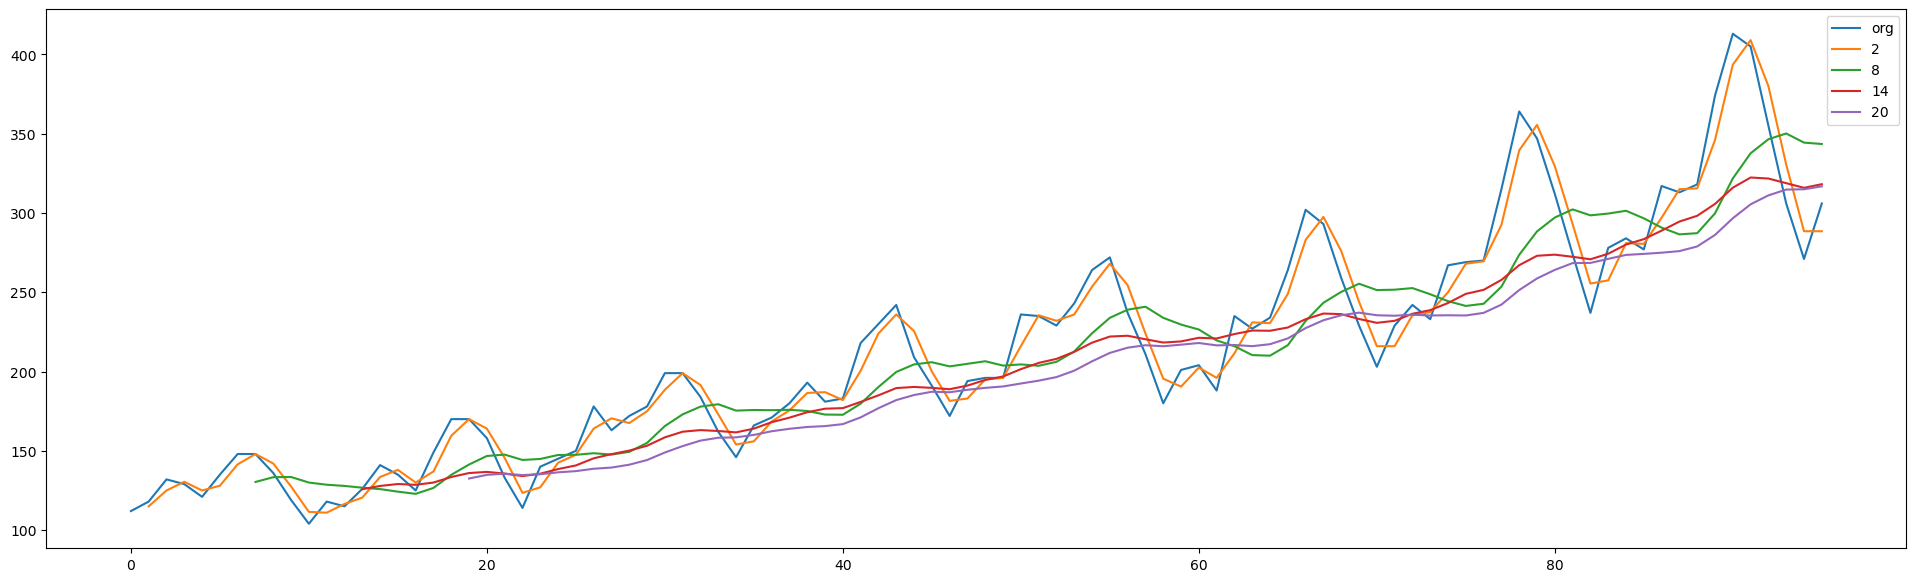

In [260]:
plt.figure(figsize=(24,7))
rohu['Passengers'].plot(label="org")
for i in range(2,24,6):
    rohu["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [261]:
#Original Data: The blue line in the plot represents the original passenger counts over time. It serves as a reference for understanding the raw data's behavior and trends.

#Multiple Rolling Means: The plot includes multiple rolling mean lines, each calculated with a different window size (2, 8, 14, and 20). Each rolling mean line smooths the data and provides a different level of emphasis on short-term or long-term trends.

#Window Size Variation: The use of multiple window sizes allows for the exploration of different aspects of the data's behavior. Smaller window sizes (e.g., 2) capture short-term variations, while larger window sizes (e.g., 20) offer a more generalized view of trends.

#Smoothing Effect: As the window size increases, the smoothing effect becomes more pronounced. Larger window sizes result in smoother lines that filter out noise and highlight longer-term patterns.

#Trend Identification: Analyzing the multiple rolling mean lines can help identify trends of different durations. Short-term trends are more evident in rolling means with smaller window sizes, while longer-term trends are emphasized in rolling means with larger window sizes.

#Seasonality Detection: Seasonal patterns, if present in the data, may become more apparent in certain rolling mean lines. For example, annual seasonality might be more visible in the rolling mean with a window size of 14 or 20.

#Comparative Analysis: The overlay of multiple rolling means enables viewers to compare the level of smoothing and trend emphasis across different window sizes. This comparative analysis can provide richer insights into the data's behavior.

#Interpretation: Interpretation of the rolling mean lines should consider that they represent smoothed versions of the data. The choice of window size impacts the degree of smoothing and the level of detail visible in the plot.

#Insight Generation: This visualization is valuable for generating insights into how different window sizes affect the perception of data trends. It can guide decisions regarding which window size to use for further analysis or modeling.

#Data Exploration: The plot is a useful exploratory tool for understanding the underlying patterns in time series data and can inform subsequent analyses or modeling efforts.

# Time series decomposition plot


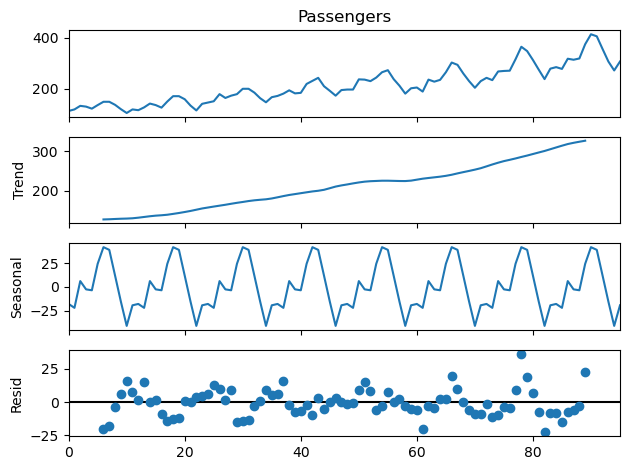

In [262]:
decompose_ts_add = seasonal_decompose(rohu['Passengers'], period = 12)
decompose_ts_add.plot()
plt.show()

In [263]:
#Trend Component: The top subplot in the decomposition plot represents the trend component. It shows the underlying trend or long-term pattern in the passenger counts, often by smoothing out short-term fluctuations. This component helps in understanding the general direction of passenger count changes over time.

#Seasonal Component: The middle subplot represents the seasonal component. It captures the recurring patterns or seasonality in the data. In this case, the period is set to 12, indicating a yearly seasonality. Seasonal patterns, such as peaks during certain months, troughs during others, and annual cycles, are visible in this component.

#Residuals Component: The bottom subplot displays the residuals component. It represents the unexplained or random variation in the data that is not accounted for by the trend and seasonality components. Residuals should ideally appear as random noise with no discernible pattern.

#Component Separation: The decomposition effectively separates the time series into these three components, making it easier to analyze and model each aspect of the data individually. This separation aids in understanding the underlying structure of the time series.

#Pattern Identification: By examining the seasonal component, you can identify the nature of seasonality, including its amplitude and timing. This information is valuable for understanding when passenger counts tend to increase or decrease throughout the year.

#Trend Assessment: The trend component reveals whether passenger counts are generally increasing, decreasing, or remaining stable over time. Trends can provide insights into long-term growth or decline in the airline industry.

#Residual Analysis: Examining the residuals component helps evaluate the quality of the decomposition. Ideally, residuals should be random and centered around zero, with no remaining patterns. Detecting patterns or trends in the residuals may suggest that the decomposition model can be improved.

#Seasonal Decomposition Tools: Seasonal decomposition is a valuable technique for understanding time series data, especially when seasonal patterns are present. It can assist in forecasting and modeling efforts by providing insights into the data's underlying structure.

#Model Selection: The results of the decomposition can inform the selection of appropriate time series forecasting models, such as ARIMA or seasonal decomposition of time series (STL) models.

#Data Interpretation: Interpretation of the decomposition results should consider the specific context and domain knowledge. Understanding the factors driving trends and seasonality is essential for making informed decisions.


# ACF plots and PACF plots

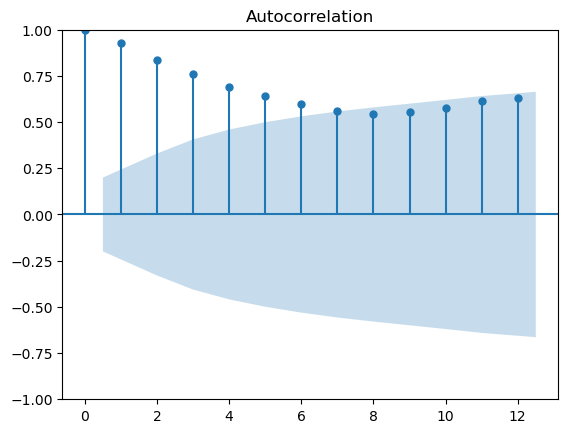

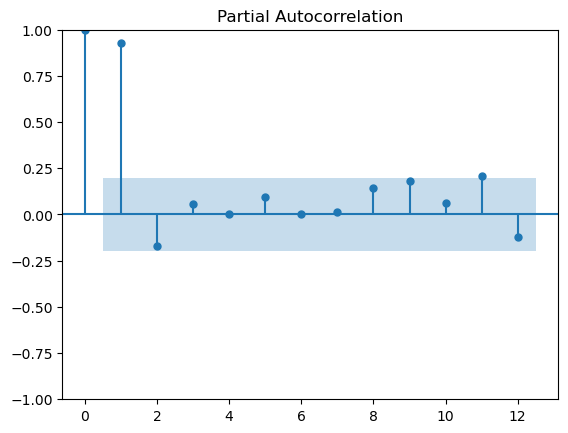

In [264]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(rohu.Passengers,lags=12)
tsa_plots.plot_pacf(rohu.Passengers,lags=12)
plt.show()

In [265]:
#Partial Autocorrelation (PACF) Plot (Bottom):

#PACF Calculation: The bottom plot is the partial autocorrelation function (PACF) plot. PACF measures the direct correlation between two time points while controlling for the influence of other intermediate lags.

#Identification of AR Terms: Peaks in the PACF plot at specific lags may indicate the order of autoregressive (AR) terms in a potential ARIMA (AutoRegressive Integrated Moving Average) model. PACF helps identify the lags with significant direct effects on the current observation.

#PACF Decay: Similar to the ACF plot, the PACF plot also typically shows a decay in partial autocorrelation as the lags increase. This is a characteristic of autoregressive models, where the direct influence of distant time points diminishes.

#Model Selection: The PACF plot can assist in selecting the order of the AR component (p) in an ARIMA model. Significant peaks at specific lags suggest which lags to include in the AR component.

#Seasonal Components: Seasonal patterns may also be reflected in the PACF plot, particularly if they affect the direct relationships between time points.

#Model Building: Autocorrelation and partial autocorrelation analyses are essential steps in time series modeling. They guide the selection of appropriate model orders (e.g., AR, MA, seasonal) and provide insights into the data's temporal dependencies.


# Evaluation Metric MAPE

In [266]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential Method

In [267]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

C:\Users\91920\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


13.411274758932686

# Holt method

In [268]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

C:\Users\91920\AppData\Local\Temp\ipykernel_22100\2579047746.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
C:\Users\91920\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


23.530719644076488

### Holts winter exponential smoothing with additive seasonality and additive trend

In [269]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

5.730286880515042

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [270]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

2.8210913424868784

### Final Model by combining train and test

In [271]:
hwe_model_mul_add = ExponentialSmoothing(rohu["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 

In [272]:
#Forecasting for next 12 time periods
hwe_model_mul_add.forecast(12)

96     312.899560
97     308.171547
98     355.533060
99     345.770145
100    345.696478
101    392.471215
102    436.501917
103    429.859801
104    380.173448
105    332.317859
106    290.626129
107    330.590939
dtype: float64

### Forecasting using Auto ARIMA model

In [273]:
import statsmodels.tsa.seasonal
from pmdarima import auto_arima

In [274]:
rohu=pd.read_excel("C:\\Users\\91920\\Downloads\\Airlines+Data.xlsx",header=0, index_col=0, parse_dates=True)


In [275]:
rohu

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


<Axes: xlabel='Month'>

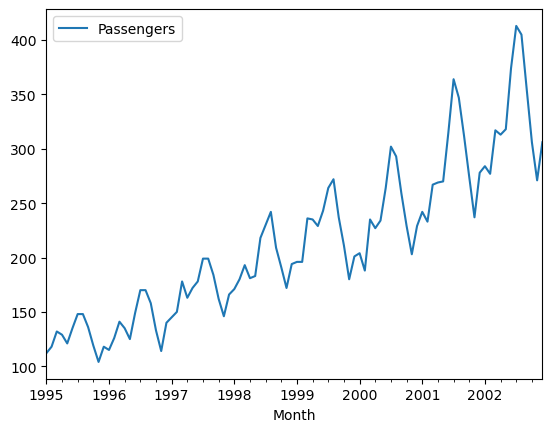

In [276]:
rohu.plot()


In [277]:
#Data Visualization: The rohu.plot() command generates a line plot of the time series data. This plot allows for a visual inspection of the data's behavior over time, revealing trends, seasonality, and other patterns.

#Data Exploration: Data visualization is a crucial initial step in time series analysis. It helps in gaining a preliminary understanding of the data's characteristics, which is essential before proceeding with modeling.

#Patterns Identification: In the plot, try to identify any evident patterns or trends in the data. Look for potential seasonality, cyclical behavior, or any long-term trends that may be present.

#Data Preprocessing: Depending on the data's characteristics, preprocessing steps such as detrending, differencing, or removing seasonality may be necessary to make the data suitable for time series modeling.

#Seasonal Decomposition: Consider conducting a seasonal decomposition to separate the data into trend, seasonality, and residuals components. This decomposition can reveal underlying patterns more clearly.

#Model Selection: The import statement for auto_arima suggests that you may intend to use automatic model selection and hyperparameter tuning. auto_arima can help identify an appropriate ARIMA model order (p, d, q) and potentially seasonal order (P, D, Q, s) based on the data.

#Hyperparameter Tuning: Model selection is a crucial step in time series analysis. It's important to identify the optimal order of differencing (d) and the orders of the ARIMA components (p, q, P, Q) that best fit the data. auto_arima automates this process by searching for the best-fitting model.

#Model Evaluation: After selecting a model, it's essential to evaluate its performance using appropriate metrics (e.g., Mean Absolute Error, Root Mean Square Error) and diagnostic checks (e.g., residual analysis) to ensure that the model captures the data's underlying patterns accurately.

#Forecasting: Once a satisfactory model is selected and validated, it can be used for forecasting future values of the time series. The accuracy of the forecasts is critical for making informed decisions.

#Domain Knowledge: Consider incorporating domain knowledge and external factors that may influence the time series. This information can help improve model accuracy and provide better insights.


In [278]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(rohu)

(0.01, False)

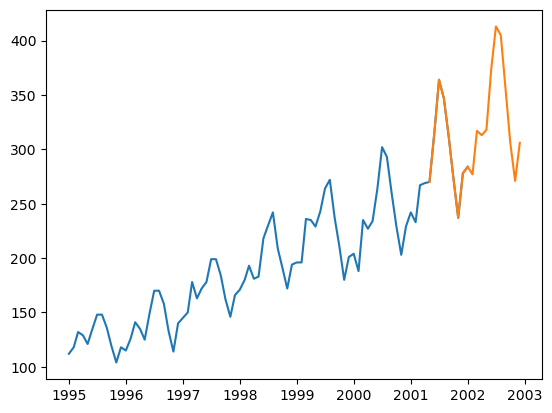

In [279]:
train = rohu[:85]
test = rohu[-20:]
plt.plot(train)
plt.plot(test)

In [280]:
#Training and Test Sets: The time series data is divided into two sets: the training set (train) and the test set (test). This division is a common practice in time series analysis to assess the performance of forecasting models.

#Training Data: The blue line in the plot represents the training data, which consists of the initial portion of the time series (the first 85 data points in this case). The training data is used to build and calibrate forecasting models.

#Test Data: The orange line in the plot represents the test data, which consists of the remaining portion of the time series (the last 20 data points in this case). The test data is reserved for evaluating the model's accuracy and making out-of-sample forecasts.

#Data Splitting: The choice of the splitting point (85 for training and 20 for testing) should be made carefully to ensure that there is a sufficient amount of data for model training while also allowing for a meaningful evaluation on the test data.

#Forecasting Evaluation: The split between training and test data enables the assessment of the forecasting model's performance. The model is trained on the training data and then used to make forecasts on the test data. The accuracy of these forecasts can be evaluated against the actual values in the test set.

#Overfitting Prevention: Splitting the data helps prevent overfitting, as it assesses the model's ability to generalize to unseen data. Overfitting occurs when a model fits the training data too closely and performs poorly on new, unseen data.

#Visual Inspection: The plot visually displays the training and test data, making it easy to observe any differences, patterns, or trends in the two sets.

#Model Validation: The test data serves as a validation mechanism for the forecasting model. It provides an independent dataset to verify the model's accuracy and suitability for making future predictions.

#Forecasting Applications: Once a forecasting model is built and evaluated, it can be used to make predictions for future time points beyond the end of the test set. These forecasts can be valuable for decision-making and planning.

In [281]:
arima_model = auto_arima(train, start_p=0, d=1, start_q=0,
                        max_p=5, max_d=5, max_q=5, start_P=0,
                        D=1, start_Q=0, max_P=5, max_D=5,
                        max_Q=5, m=12, seasonal=True,
                        error_action='warn',trace=True,
                        suppress_warnings=True,stepwise=True,
                         random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=543.172, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=537.489, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=537.888, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=540.215, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=539.489, Time=0.21 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=539.489, Time=0.16 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=537.948, Time=0.14 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.36 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=539.745, Time=0.08 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=539.466, Time=0.14 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=539.078, Time=0.15 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=537.388, Time=0.11 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=540.192, Time=0.06 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=539.385, Time=0.24 sec
 ARIMA(0,1,1)(1,1,1)[12]             

In [282]:
arima_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -265.694
Date:                             Fri, 08 Sep 2023   AIC                            537.388
Time:                                     16:59:55   BIC                            544.218
Sample:                                 01-01-1995   HQIC                           540.108
                                      - 01-01-2002                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2607      0.105     -2.472      0.013      -0.467      -0.054
ar.S.L12      -0.2625      0.098     -2.683      0.007      -0.454      -0.071
sigma2        92.7245     16.167      5.735      0.000      61.038     124.411
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.62
Prob(Q):                              0.99   Prob(JB):                         0.27
Heteroskedasticity (H):               2.60   Skew:                             0.45
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [283]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['predicted_pass']
prediction

,predicted_pass
Month,
2001-05-01,NaN
2001-06-01,NaN
2001-07-01,NaN
2001-08-01,NaN
2001-09-01,NaN
2001-10-01,NaN
2001-11-01,NaN
2001-12-01,NaN
2002-01-01,NaN


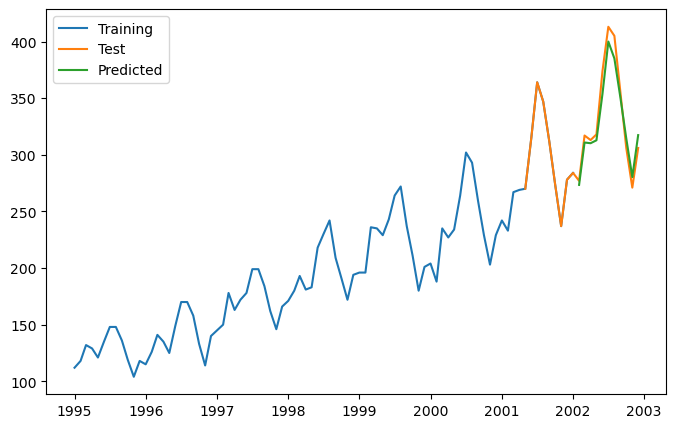

In [284]:
plt.figure(figsize=(8,5))
plt.plot(train,label='Training')
plt.plot(test, label='Test')
plt.plot(prediction, label='Predicted')
plt.legend(loc = 'upper left')
plt.show()

In [285]:
#Prediction: The ARIMA model is used to make 20-period ahead predictions (n_periods = 20) of the time series data. These predictions are stored in a DataFrame called prediction and labeled as 'predicted_pass.'

#DataFrame for Predictions: The prediction DataFrame contains the predicted values indexed by the corresponding dates in the test set. Each row represents a future time point, and the 'predicted_pass' column contains the forecasted values.

#Plot Visualization: The code creates a line plot to visualize three key elements:

#Training Data: The blue line represents the training data used to build and calibrate the forecasting model.

#Test Data: The orange line represents the test data, which was reserved for evaluation.

#Predicted Data: The green line represents the predicted values generated by the ARIMA model for the 20 future time points.

#Model Performance: The plot allows for a visual assessment of how well the ARIMA model's predictions align with the actual test data. It helps in evaluating the model's accuracy and effectiveness in forecasting.

#Validation: The test data serves as a validation set to assess the model's performance on unseen data. The proximity of the green line (predicted values) to the orange line (test data) indicates how well the model captures the future behavior of the time series.

#Forecast Evaluation: Metrics such as Mean Absolute Error (MAE), Root Mean Square Error (RMSE), or others can be calculated to quantitatively assess the accuracy of the model's forecasts.

#Decision Support: The accurate forecasting of future values can support decision-making in various domains, such as demand forecasting, capacity planning, and resource allocation.

#Model Refinement: If the model's predictions do not align well with the test data, further model refinement, parameter tuning, or the exploration of alternative models may be necessary to improve forecasting accuracy.

# Persistence/ Base model

In [286]:
# evaluate a persistence model and load  data
train = pd.read_csv("C:\\Users\\91920\\Downloads\\Airlines data Forecasts.csv", header=None, index_col=0, parse_dates=True, squeeze=True)
train

C:\Users\91920\AppData\Local\Temp\ipykernel_22100\2292632811.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = pd.read_csv("C:\\Users\\91920\\Downloads\\Airlines data Forecasts.csv", header=None, index_col=0, parse_dates=True, squeeze=True)


0
Month         Passengers
01-01-1995           112
02-01-1995           118
03-01-1995           132
04-01-1995           129
                 ...    
02-04-1995           405
03-04-1995           355
04-04-1995           306
05-04-1995           271
06-04-1995           306
Name: 1, Length: 97, dtype: object

In [287]:
# prepare data
X = train.values
X

array(['Passengers', '112', '118', '132', '129', '121', '135', '148',
       '148', '136', '119', '104', '118', '115', '126', '141', '135',
       '125', '149', '170', '170', '158', '133', '114', '140', '145',
       '150', '178', '163', '172', '178', '199', '199', '184', '162',
       '146', '166', '171', '180', '193', '181', '183', '218', '230',
       '242', '209', '191', '172', '194', '196', '196', '236', '235',
       '229', '243', '264', '272', '237', '211', '180', '201', '204',
       '188', '235', '227', '234', '264', '302', '293', '259', '229',
       '203', '229', '242', '233', '267', '269', '270', '315', '364',
       '347', '312', '274', '237', '278', '284', '277', '317', '313',
       '318', '374', '413', '405', '355', '306', '271', '306'],
      dtype=object)

In [288]:
# Prepare data
X = X.astype('float32')
X

ValueError: could not convert string to float: 'Passengers'

In [ ]:
train_size = int(len(X) * 0.50)
train_size

In [ ]:
train, test = X[0:train_size], X[train_size:]

In [ ]:
train

In [ ]:
test


In [ ]:
#walk-forward validation
history = [x for x in train]
import warnings
history

## Predictions

In [ ]:
predictions = list()

for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    
    # observation
    obs = test[i]
    history.append(obs)
    
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

In [ ]:
# report performance
rmse = np.sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

## Build Model based on the optimized values

In [295]:
# save finalized model to file and load data
train = pd.read_csv("C:\\Users\\91920\\Downloads\\Airlines data Forecasts.csv", header=0, index_col=0, parse_dates=True)
train

C:\Users\91920\AppData\Local\Temp\ipykernel_22100\1880266893.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train = pd.read_csv("C:\\Users\\91920\\Downloads\\Airlines data Forecasts.csv", header=0, index_col=0, parse_dates=True)


,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
1995-02-04,405
1995-03-04,355
1995-04-04,306


In [296]:
# prepare data
X = train.values
X = X.astype('float32')

In [297]:
# fit model
model = ARIMA(X, order=(3,1,3))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 12)
forecast

C:\Users\91920\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


array([327.51198486, 336.97643358, 363.41304363, 374.2859744 ,
       387.10873533, 383.24314318, 377.04347212, 360.90931111,
       347.39880084, 333.96090136, 328.80521789, 328.90824126])

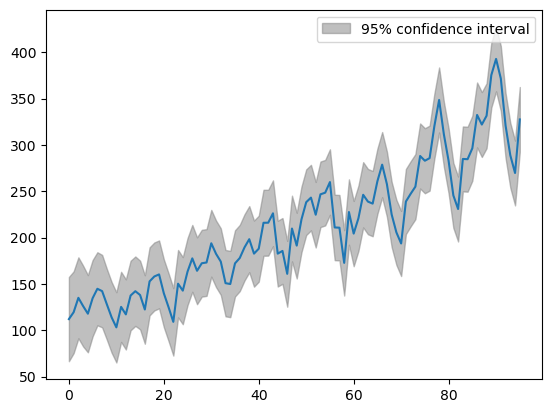

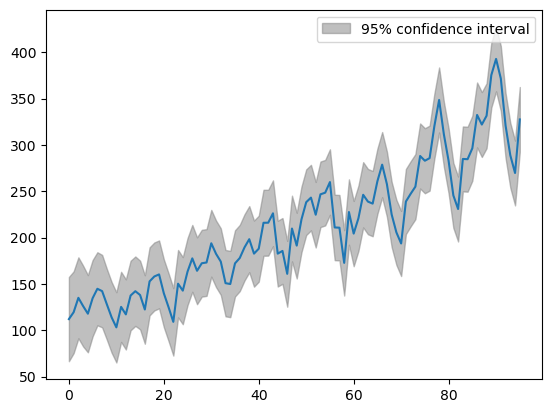

In [298]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,96)
#model_fit.plot_predict(1, 96)


In [299]:
#Observed Data: The observed time series data is usually plotted as a solid line on the graph.

#Predicted Data: The predicted values are often represented as dots or a line that extends beyond the observed data. These represent the model's forecast.

#Confidence Intervals: ARIMA models typically provide confidence intervals around the predicted values. These intervals help assess the uncertainty of the forecasts.

### Combine train and test data and build final model


In [300]:
# fit model
rohu=pd.read_excel("C:\\Users\\91920\\Downloads\\Airlines+Data.xlsx",header=0, index_col=0, parse_dates=True)

In [301]:
# prepare data
X = train.values
X = X.astype('float32')

In [302]:
model = ARIMA(X, order=(3,1,3))
model_fit = model.fit()

C:\Users\91920\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [303]:
forecast=model_fit.forecast(steps=12)
forecast

array([327.51198486, 336.97643358, 363.41304363, 374.2859744 ,
       387.10873533, 383.24314318, 377.04347212, 360.90931111,
       347.39880084, 333.96090136, 328.80521789, 328.90824126])

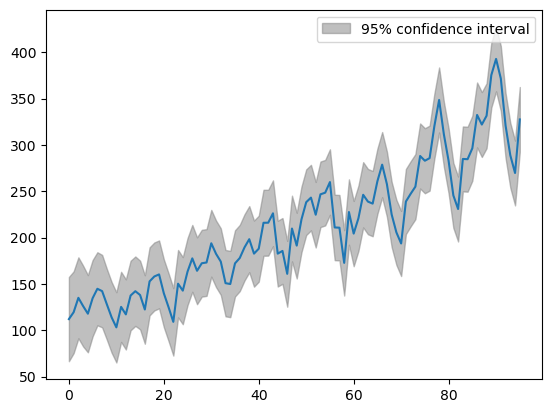

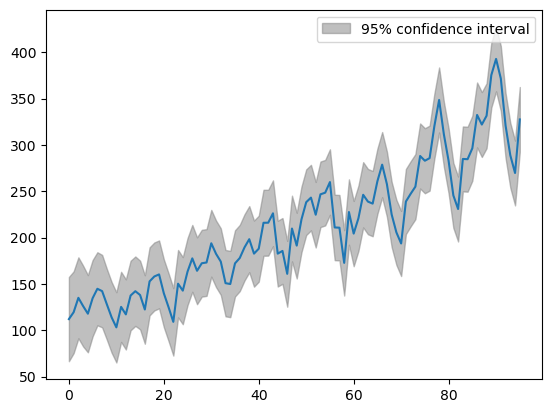

In [304]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,96)

In [305]:
#Observed Data: The observed time series data is usually plotted as a solid line on the graph.

#Predicted Data: The predicted values are often represented as dots or a line that extends beyond the observed data. These represent the model's forecast.

#Confidence Intervals: ARIMA models typically provide confidence intervals around the predicted values. These intervals help assess the uncertainty of the forecasts.

#### Inference: By using Auto ARIMA Model we get values for ARIMA as (0,1,1)(1,1,0) [12].


## 2. Coka Cola Dataset


In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

In [307]:
coke=pd.read_excel("C:\\Users\\91920\\Downloads\\CocaCola_Sales_Rawdata.xlsx",
                    index_col=0, 
                    parse_dates=True)
coke

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [308]:
coke.info()


<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


## Visualizations

In [309]:
coke = pd.read_excel("C:\\Users\\91920\\Downloads\\CocaCola_Sales_Rawdata.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True)
coke

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [310]:
coke.index


Index(['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87', 'Q4_87',
       'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89', 'Q3_89', 'Q4_89',
       'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91', 'Q2_91', 'Q3_91', 'Q4_91',
       'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92', 'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93',
       'Q1_94', 'Q2_94', 'Q3_94', 'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95',
       'Q1_96', 'Q2_96'],
      dtype='object', name='Quarter')

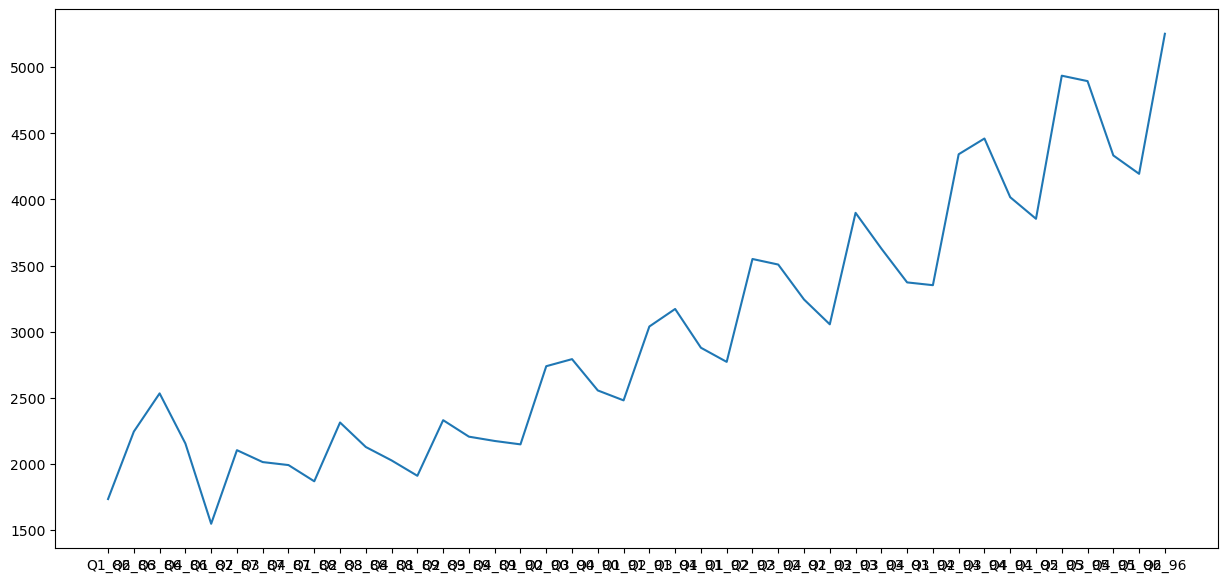

In [311]:
plt.figure(figsize = (15,7))
plt.plot(coke)

In [312]:
#Trends: Look for any long-term trends in Coca-Cola sales over time. Is there a noticeable increase or decrease in sales?

#Seasonality: Check for repeating patterns or seasonality in the data. Are there regular peaks or valleys in sales that occur at specific intervals?

#Outliers: Identify any unusual data points that stand out. These may represent exceptional events or anomalies.

#Overall Patterns: Examine the overall shape of the time series. Are there any notable patterns or irregularities that might be of interest?

#Data Range: Pay attention to the range of dates covered by the plot. This will help you understand the time span of the sales data.

### Histogram and Density Plots


<Axes: ylabel='Density'>

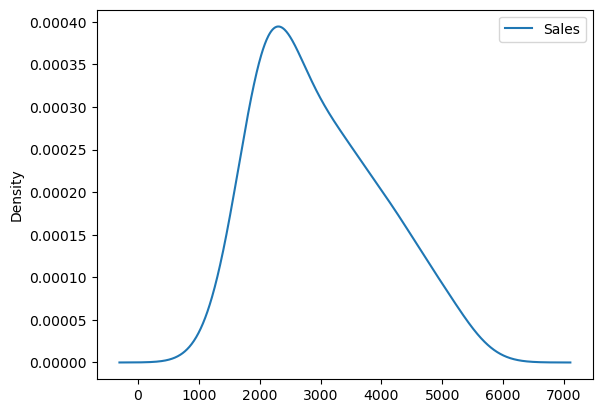

In [313]:
# create a density plot
coke.plot(kind='kde')

In [314]:
#Distribution Shape: The shape of the density plot reveals information about the underlying distribution of the data. Common shapes include bell-shaped (normal distribution), skewed, bimodal, or multimodal distributions.

#Central Tendency: You can estimate the central tendency (mean or median) of the data based on the peak of the density plot.

#Spread: The spread or variability of the data can be inferred from the width of the density plot. Wider plots indicate higher variability.

#Outliers: Outliers, if present, may appear as isolated peaks or troughs in the density plot.

#Mode(s): Multimodal distributions may have multiple peaks, indicating different modes in the data.

#Skewness: The symmetry of the distribution can be assessed. Positive skew (right-skewed) means a long right tail, while negative skew (left-skewed) means a long left tail.

array([[<Axes: title={'center': 'Sales'}>]], dtype=object)

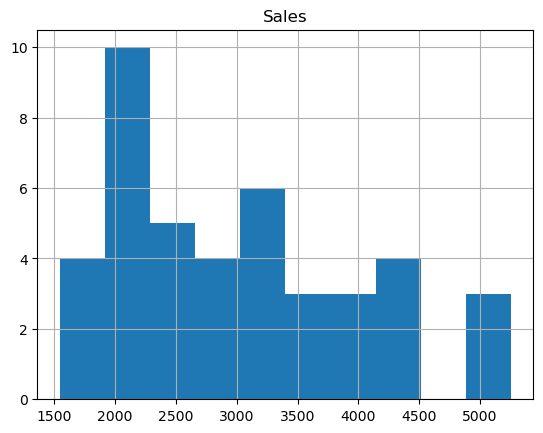

In [315]:
# create a histogram plot
coke.hist()

In [316]:
#Distribution Shape: The shape of the histogram can provide insights into the underlying distribution of the data. Common shapes include bell-shaped (normal distribution), skewed (left or right), bimodal (two peaks), or multimodal (more than two peaks) distributions.

#Central Tendency: The location of the peak of the histogram represents the mode of the data, which is an estimate of the central tendency. It can help identify where most of the data points cluster.

#Spread and Variability: The spread of the histogram can give an indication of the variability or dispersion of the data. Wider histograms indicate higher variability.

#Outliers: Outliers, if present, may appear as data points that fall far from the main bulk of the data within the histogram.

#Skewness: The symmetry of the distribution can be assessed. Positive skew (right-skewed) means a long right tail, while negative skew (left-skewed) means a long left tail.

#Bin Selection: The choice of bin width can impact the appearance of the histogram. Different bin widths can reveal different aspects of the data's distribution.

#Histograms are useful for gaining a visual understanding of data distribution and can serve as a preliminary step in data exploration and analysis. They help identify patterns and characteristics of the data that may not be immediately apparent from summary statistics alone.

# Lag plot


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

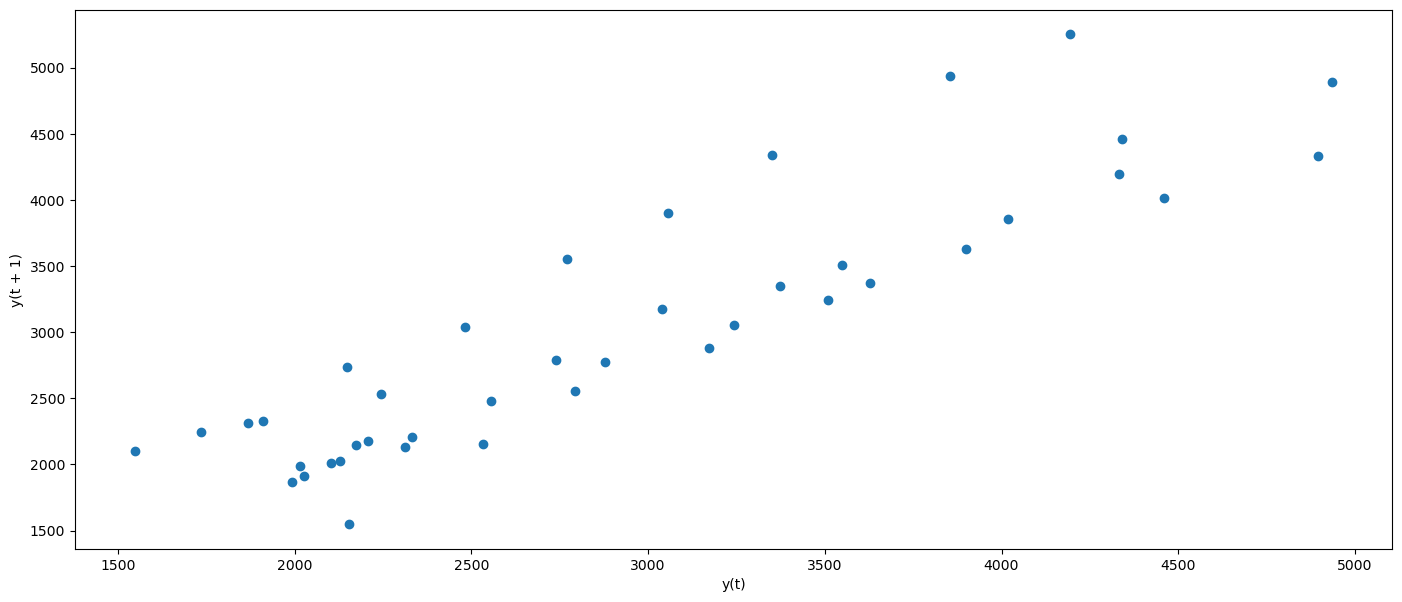

In [317]:
# create a scatter plot
plt.figure(figsize = (17,7))
pd.plotting.lag_plot(coke)

In [318]:
#Correlation and Autocorrelation: A lag plot can help you assess the autocorrelation of the time series. If the data points are scattered randomly in the plot, it suggests little to no autocorrelation. However, if there is a pattern or structure, it indicates some level of autocorrelation.

#Linearity: The shape of the scatter plot can provide insights into the linearity of the relationship between the data point at time t and its lagged counterpart at time t-k. A diagonal or curved pattern may indicate a non-linear relationship.

#Seasonality: In time series data, seasonality can often be detected as repeating patterns or clusters in the lag plot.

#Outliers: Outliers, if present, may appear as data points that deviate significantly from the main cluster in the lag plot.

#Time Dependence: A strong linear or non-linear structure in the lag plot suggests that the data points are dependent on their past values, which is a key characteristic of time series data.


<Figure size 5000x1500 with 0 Axes>

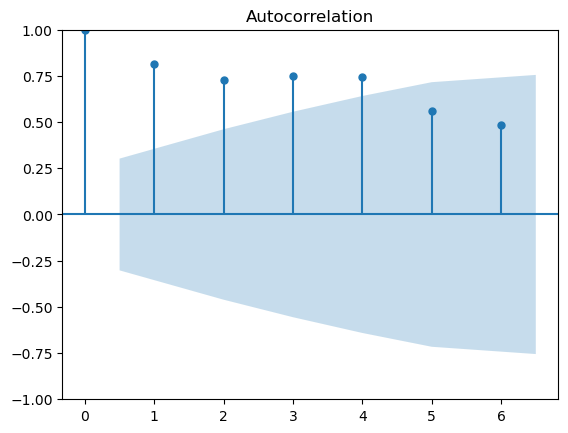

In [319]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (50,15))
plot_acf(coke, lags=6)
plt.show()

In [320]:
#Autocorrelation Strength: The height of the bars in the ACF plot at each lag indicates the strength of the autocorrelation at that lag. Higher bars suggest stronger autocorrelation.

#Lag Values: The x-axis of the plot represents the lag values. For example, a lag of 1 corresponds to the autocorrelation between the time series and itself shifted by one time step.

#Significance: To determine whether an autocorrelation is statistically significant, you can compare the bar heights to the shaded region (confidence interval) in the plot. If a bar extends beyond the shaded region, it suggests a statistically significant autocorrelation.

#Seasonality: Repeating patterns in the ACF plot, such as regularly spaced peaks, may indicate seasonality in the data.

#Damping or Decay: The ACF plot can also reveal whether autocorrelations dampen or decay as the lag increases. Exponential decay or a gradual decrease in autocorrelations suggests a decaying process.


# Box and Whisker Plots by Interval

In [321]:
coke = pd.read_excel("C:\\Users\\91920\\Downloads\\CocaCola_Sales_Rawdata.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True,
                    squeeze=True)
coke

C:\Users\91920\AppData\Local\Temp\ipykernel_22100\2059360256.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  coke = pd.read_excel("C:\\Users\\91920\\Downloads\\CocaCola_Sales_Rawdata.xlsx",


Quarter
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Q1_94    3352.000000
Q2_94    4342.000000
Q3_94    4461.000000
Q4_94    4017.000000
Q1_95    3854.000000
Q2_95    4936.000000
Q3_95    4895.000000
Q4_95    4333.000000
Q1_96    4194.000000
Q2_96    5253.000000
Name: Sales, dtype: float64

In [322]:
type(coke)


pandas.core.series.Series

### Sampling and Basic Transformations

In [323]:
coke = pd.read_excel("C:\\Users\\91920\\Downloads\\CocaCola_Sales_Rawdata.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True,
                    squeeze=True)
coke

C:\Users\91920\AppData\Local\Temp\ipykernel_22100\2059360256.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  coke = pd.read_excel("C:\\Users\\91920\\Downloads\\CocaCola_Sales_Rawdata.xlsx",


Quarter
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Q1_94    3352.000000
Q2_94    4342.000000
Q3_94    4461.000000
Q4_94    4017.000000
Q1_95    3854.000000
Q2_95    4936.000000
Q3_95    4895.000000
Q4_95    4333.000000
Q1_96    4194.000000
Q2_96    5253.000000
Name: Sales, dtype: float64

In [324]:
coke.shape


(42,)

In [325]:
coke = pd.read_excel("C:\\Users\\91920\\Downloads\\CocaCola_Sales_Rawdata.xlsx")


In [326]:
quarter =['Q1','Q2','Q3','Q4']


In [327]:
p = coke["Quarter"][0]
p[0:2]
coke['quarter']= 0

for i in range(42):
    p = coke["Quarter"][i]
    coke['quarter'][i]= p[0:2]

coke

C:\Users\91920\AppData\Local\Temp\ipykernel_22100\116742739.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coke['quarter'][i]= p[0:2]


,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [328]:
quarter_dummies = pd.DataFrame(pd.get_dummies(coke['quarter']))
quarter_dummies

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [329]:
coke=pd.concat([coke,quarter_dummies],axis=1)
coke


,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [330]:
# Complete the dataset
coke['t']=np.arange(1,43)
coke['t_square']=np.square(coke.t)
coke['log_Sales']=np.log(coke.Sales)
coke


,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


## Forecasting - Model Based Methods

In [331]:
coke


,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


<Axes: >

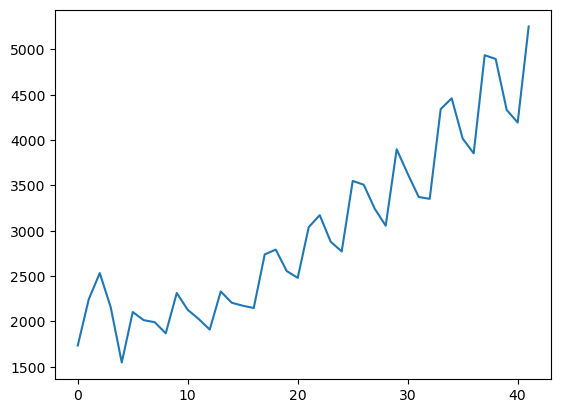

In [332]:
coke['Sales'].plot()


In [333]:
#Trend: You can observe any trends or patterns in the sales data. Trends may include increasing or decreasing sales over time.

#Seasonality: Check for recurring patterns or seasonality in the data. Seasonal peaks and valleys may indicate regular sales fluctuations.

#Outliers: Identify any unusual data points that stand out from the main sales trend. Outliers may represent exceptional events or anomalies.

#Data Range: Pay attention to the range of dates covered by the plot to understand the time span of the sales data.

<Axes: xlabel='quarter', ylabel='Sales'>

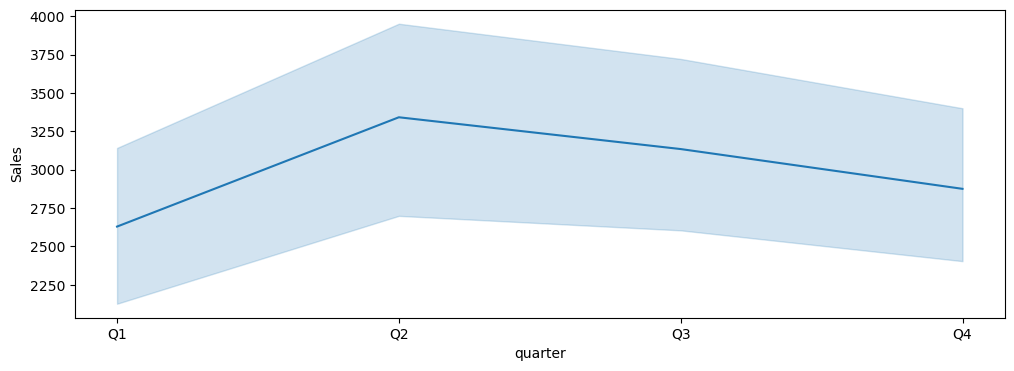

In [334]:
plt.figure(figsize=(12,4))
sns.lineplot(x="quarter",y="Sales",data=coke)

In [335]:
#Sales Trends: You can observe trends in Coca-Cola sales over time. For example, you may see periods of growth, decline, or stability in sales.

#Seasonality: Check for any recurring patterns or seasonality in sales across different quarters. Seasonal peaks or drops may indicate regular sales fluctuations.

#Quarterly Variations: Identify variations in sales between different quarters. You can assess which quarters have higher or lower sales, which is valuable for business planning and decision-making.

#Yearly Patterns: Depending on the dataset's time span, you may also notice yearly patterns or cycles that repeat over multiple years.

#Outliers: Look for any unusual spikes or drops in sales within specific quarters. Outliers can provide insights into exceptional events or anomalies that affected sales.

### Splitting data


In [336]:
coke

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [337]:
# For self understanding of forecasting values data split into multiples of 12
Train = coke.head(25)
Test = coke.tail(7)

In [338]:
Train


,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [339]:
Test


,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
35,Q4_94,4017.0,Q4,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,Q1,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,Q2,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555


In [340]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

1191.9149910119418

In [341]:
#Exponential
Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

985.8997545307496

In [342]:
#Quadratic 
Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

825.0423176018923

In [343]:
#Additive seasonality 
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1', 'Q2', 'Q3', 'Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

2223.0393341466033

In [344]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1', 'Q2', 'Q3', 'Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

1167.8830159279532

In [345]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

2249.1183555973294

In [346]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

855.1081851233508

In [347]:
#Multiplicative Seasonality Quadratic 
mult_sea_Quad = smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(Test[['Q1', 'Q2', 'Q3', 'Q4','t','t_square']]))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad

4515.079135663087

In [348]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_Quad,825.042318
6,rmse_Mult_add_sea,855.108185
1,rmse_Exp,985.899755
4,rmse_add_sea_quad,1167.883016
0,rmse_linear,1191.914991
3,rmse_add_sea,2223.039334
5,rmse_Mult_sea,2249.118356


In [349]:
#Build the model on entire data set
model_full = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=coke).fit()

In [350]:
pred_new  = pd.Series(model_full.predict(coke))
pred_new

0     1626.592727
1     2268.402339
2     2189.685821
3     1867.242917
4     1658.311143
5     2314.185178
6     2249.533083
7     1941.154603
8     1746.287252
9     2416.225709
10    2365.638037
11    2071.323979
12    1890.521051
13    2574.523931
14    2538.000682
15    2257.751047
16    2091.012542
17    2789.079845
18    2766.621019
19    2500.435807
20    2347.761724
21    3059.893450
22    3051.499047
23    2799.378257
24    2660.768598
25    3386.964746
26    3392.634766
27    3154.578400
28    3030.033163
29    3770.293734
30    3790.028177
31    3566.036233
32    3455.555419
33    4209.880414
34    4243.679279
35    4033.751758
36    3937.335367
37    4705.724784
38    4753.588072
39    4557.724974
40    4475.373006
41    5257.826846
dtype: float64

In [351]:
coke["forecasted_Sales"] = pd.Series(np.exp(pred_new))


C:\Users\91920\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


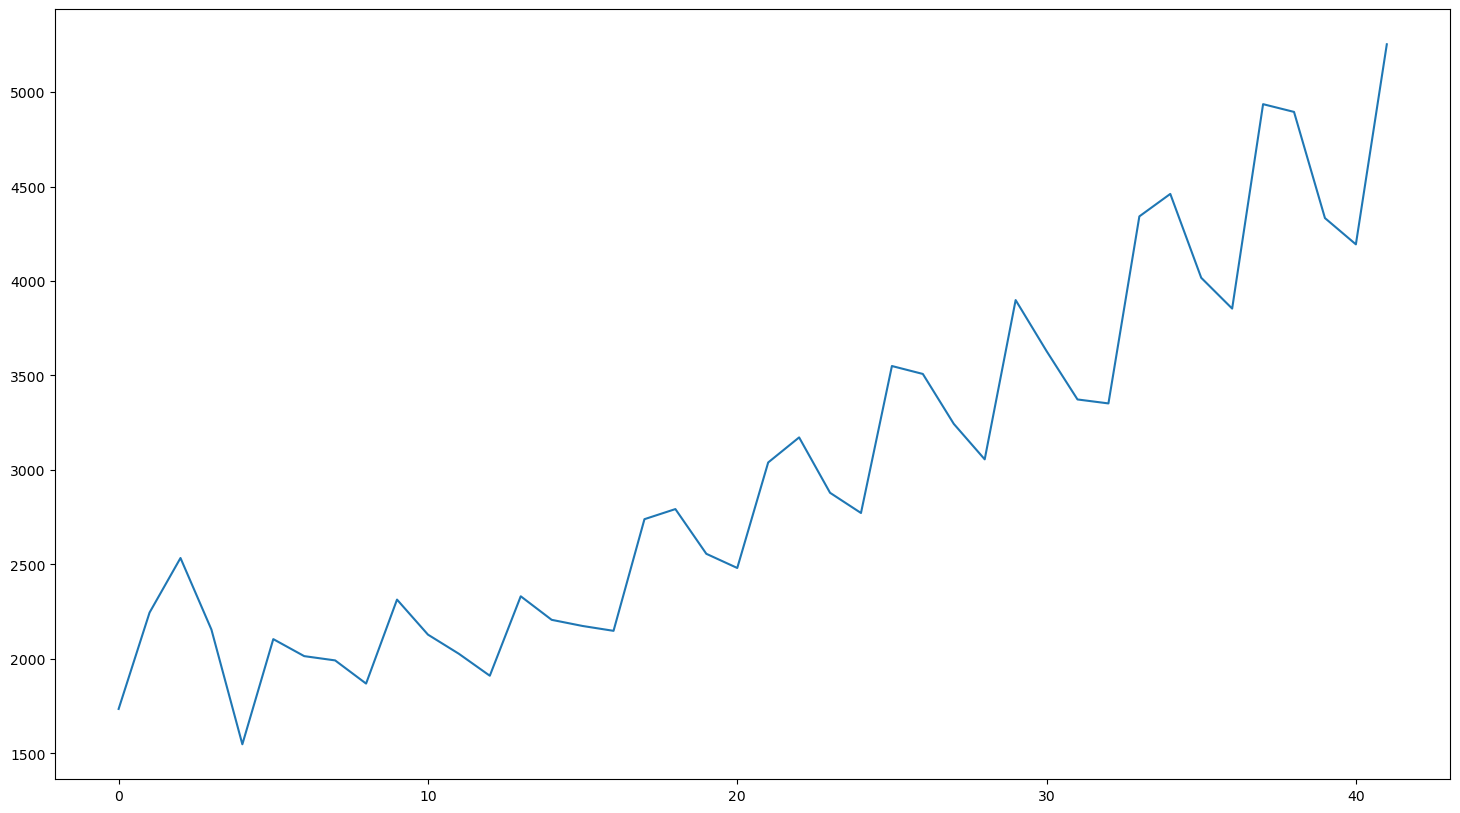

In [352]:
plt.figure(figsize=(18,10))
plt.plot(coke[['Sales','forecasted_Sales']].reset_index(drop=True))

In [353]:
#Comparison: You can visually compare the actual sales values with the forecasted sales values over time. This allows you to assess how well your forecasting model is performing.

#Model Assessment: Look for areas where the actual sales data closely aligns with the forecasted sales data. This suggests that your forecasting model is accurately capturing the underlying patterns in the data.

#Discrepancies: Identify discrepancies between the actual and forecasted sales. These discrepancies can highlight periods where your model may overestimate or underestimate sales, providing insights into potential model improvements.

#Forecast Horizon: Evaluate the accuracy of the forecast over different time horizons. Assess whether the forecasted values match the actual values for both short-term and long-term predictions.

#Trends and Patterns: Analyze whether the model captures any observed trends, seasonality, or other patterns in the sales data.

### Splitting data


In [354]:
Train = coke.head(35)
Test = coke.tail(7)

# Moving Average

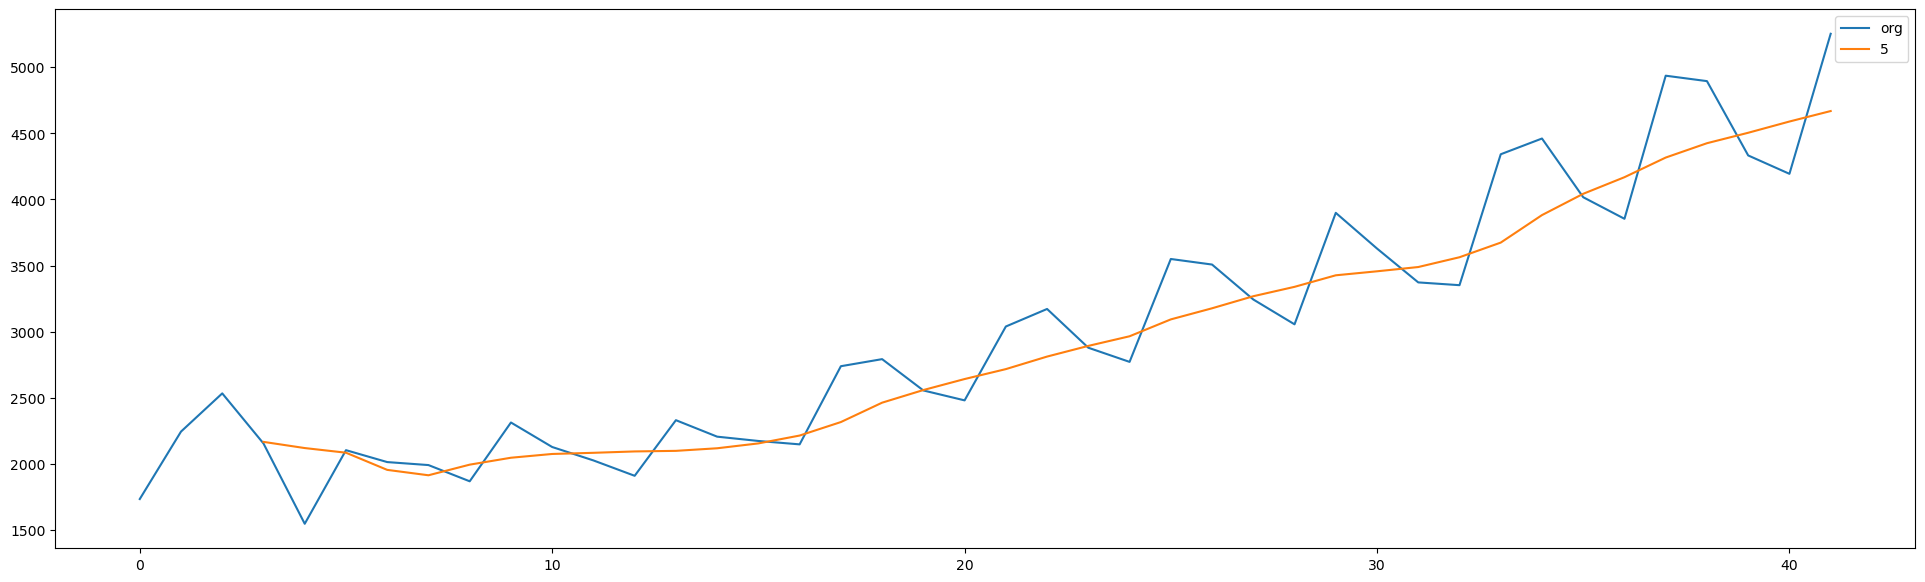

In [355]:
plt.figure(figsize=(24,7))
coke['Sales'].plot(label="org")
coke["Sales"].rolling(4).mean().plot(label=str(5))
plt.legend(loc='best')

In [356]:
#Original Sales Data: The blue line represents the original Coca-Cola sales data ('Sales'). It shows the raw sales values over time.

#Rolling Mean: The orange line represents the rolling mean of sales with a window size of 4 quarters (or months). The rolling mean smooths out short-term fluctuations and reveals underlying trends or patterns in the data.

#Comparison: By overlaying the rolling mean on the original sales data, you can visually compare how the rolling mean tracks the sales trends. It can help you identify longer-term patterns in the data by reducing noise from short-term fluctuations.

#Legend: The legend provides labels for the two lines, making it clear which line represents the original data and which represents the rolling mean.


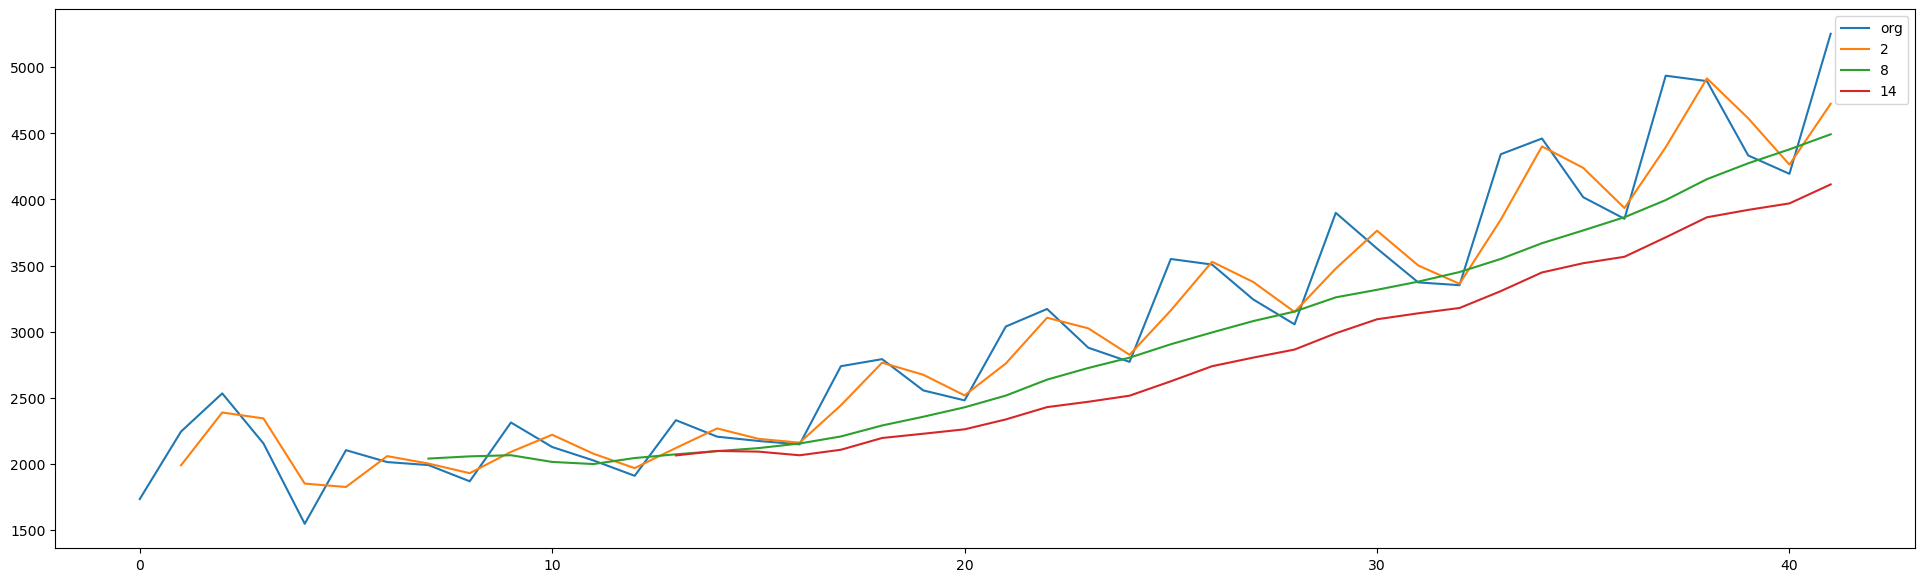

In [357]:
plt.figure(figsize=(24,7))
coke['Sales'].plot(label="org")
for i in range(2,18,6):
    coke["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [358]:
#Original Sales Data: The blue line represents the original Coca-Cola sales data ('Sales'). It shows the raw sales values over time.

#Rolling Means: Multiple rolling means are calculated and plotted with varying window sizes (2, 8, 14). Each rolling mean smooths out short-term fluctuations and provides a different level of smoothing based on the window size.

#Comparison: By overlaying the rolling means on the original sales data, you can visually compare how different window sizes affect the level of smoothing. Smaller window sizes capture shorter-term fluctuations, while larger window sizes provide smoother, longer-term trends.

#Legend: The legend provides labels for each line, making it clear which line represents the original data and which represent the rolling means with different window sizes.

## Time series decomposition plot


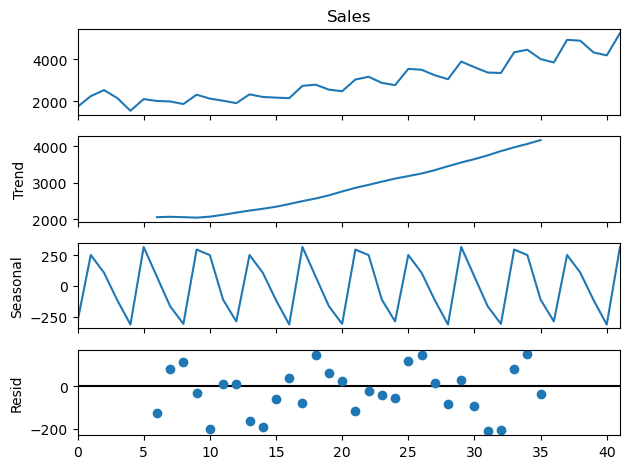

In [359]:
decompose_ts_add = seasonal_decompose(coke['Sales'], period = 12)
decompose_ts_add.plot()
plt.show()


In [360]:
#The decomposition plot shows the various components of the time series:
#Trend Component: This represents the underlying trend in Coca-Cola sales data. It may show whether sales are increasing, decreasing, or staying relatively constant over time.
#Seasonal Component: This represents the recurring patterns or seasonality in the data. In this case, since 'period' is set to 12, it suggests there is a yearly seasonality pattern.
#Residual Component: This is the remainder after removing the trend and seasonal components. It contains the noise or irregularities in the data.

### ACF plots and PACF plots

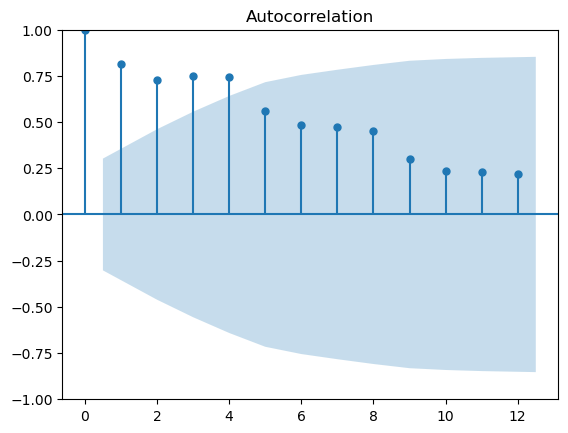

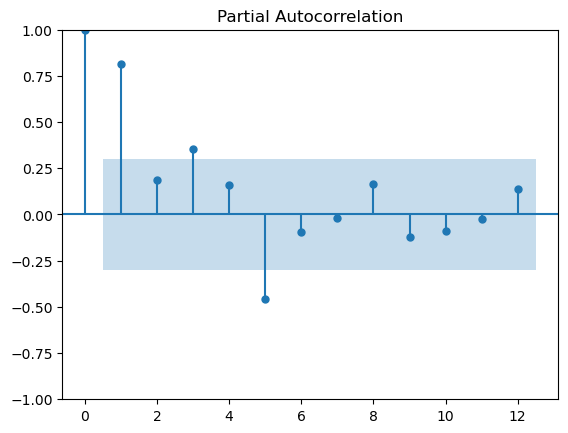

In [361]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(coke.Sales,lags=12)
tsa_plots.plot_pacf(coke.Sales,lags=12)
plt.show()

In [362]:
#When examining the ACF plot, you should check for significant spikes at lags that align with the expected seasonality in your data (e.g., 12 for yearly seasonality, assuming monthly data).
#When examining the PACF plot, you should look for significant spikes that may suggest the order of autoregressive terms (p) in an ARIMA model.
#The specific insights depend on the patterns observed in the plots. For example, if there is a significant spike at lag 12 in the ACF plot, it suggests a yearly seasonality in Coca-Cola sales data. If there are significant spikes at specific lags in the PACF plot, it suggests the presence of autoregressive behavior in the data.

### Evaluation Metric MAPE

In [363]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [364]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

C:\Users\91920\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


16.404922356416872

## Holt method


In [365]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

C:\Users\91920\AppData\Local\Temp\ipykernel_22100\1203248103.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
C:\Users\91920\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


15.901867072128256

## Holts winter exponential smoothing with additive seasonality and additive trend

In [366]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

6.09461441118907

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [367]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

4.688472335516717

### Final Model by combining train and test


In [368]:
hwe_model_mul_add = ExponentialSmoothing(coke["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 


In [369]:
#Forecasting for next 7 time periods
hwe_model_mul_add.forecast(7)

42    5030.135317
43    4685.105040
44    4557.478921
45    5744.184381
46    5798.450449
47    5244.643634
48    4995.275166
dtype: float64

### Inference: Holts Winter ES with Multilicative Seasonal & additive gives minimum error 2.52
